# **Libraries**

In [ ]:
!pip install nltk

In [1]:
# Basic
import numpy as np
from datetime import datetime as dt, timedelta as td

# Data Cleaning & Manipulation
import pandas as pd
# pd.set_option('display.float_format', lambda x: '%.2f' % x)   # change float format for dataframe
from scipy import stats
#import io

import re
import nltk
import typing
import string
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize as wt
from nltk.stem import PorterStemmer as ps
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
 #Stop words are words which in English add no meaning to the rest of the setence
 #lemmatization (aka stemming), which is the process of bringing words down to their 'root' word

# bigrams
from nltk.util import ngrams
import itertools

# Visualization
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
from collections import Counter  #frequent words
import random

#nltk.download('omw-1.4')

# **Load Datasets Collected from Kaggle and other sources (dictionaries)**

In [2]:
# Datasets from Kaggle directly downloaded to local drive

company_tweets = pd.read_csv('Datasets/Company_Tweet.csv')
tweets = pd.read_csv('Datasets/Tweet.csv')
company_values = pd.read_csv('Datasets/CompanyValues.csv')

In [3]:
# Datasets from LMD downloaded and split into positive and negative words
# https://sraf.nd.edu/loughranmcdonald-master-dictionary/

lmd_positive = pd.read_csv('Datasets/LMD_Positive.csv')
lmd_negative = pd.read_csv('Datasets/LMD_Negative.csv')

# Words extracted from General Inquirer Dictionary (HIV-4)
# https://web.archive.org/web/20210421221737/http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm
hiv4_neg_strong = pd.read_csv('Datasets/HIV4_Neg_Strong.csv')
hiv4_neg_weak = pd.read_csv('Datasets/HIV4_Neg_Weak.csv')
hiv4_neg_med = pd.read_csv('Datasets/HIV4_Neg_Med.csv')
hiv4_pos_strong = pd.read_csv('Datasets/HIV4_Pos_Strong.csv')
hiv4_pos_weak = pd.read_csv('Datasets/HIV4_Pos_Weak.csv')
hiv4_pos_med = pd.read_csv('Datasets/HIV4_Pos_Med.csv')

# **Preview dataframes to ensure it was loaded correctly**

In [4]:
company_tweets.sample()

tweet_id ticker_symbol
3234016  1199372092464123905          MSFT

In [5]:
tweets.sample()

tweet_id        writer   post_date  \
3322158  1131933846872743936  team3dstocks  1558709034   

                                                      body  comment_num  \
3322158  As I always say, " $TSLA fades are some of the...            0   

         retweet_num  like_num  
3322158            2        15

In [6]:
company_values.sample()

ticker_symbol    day_date  close_value   volume  open_value  high_value  \
5715          AMZN  2016-01-01       675.89  3745197      686.08      687.75   

      low_value  
5715     675.89

# **Check Attributes, Data Types, Range Index & Memory Usage**

In [7]:
company_tweets.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 285.7 MB


In [8]:
tweets.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 1.2 GB


In [9]:
company_values.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8 MB


## **Check number of rows, columns elements**

In [ ]:
# tweets dataset
df_check = tweets

print ('Tweets were obtained between ', pd.to_datetime(min(df_check['post_date']),unit='s'),'and ', pd.to_datetime(max(df_check['post_date']),unit='s'),'.')
print('There are ', len(df_check.columns), 'columns and ', len(df_check), 'rows, and ', df_check.size, 'elements/fields on the Twitter dataset.')

In [ ]:
# company_values dataset
df_check = company_values

print ('Stock market data were obtained between ', min(df_check['day_date']),'and ', max(df_check['day_date']),'.')
print('There are ', len(df_check.columns), 'columns and ', len(df_check), 'rows, and ', df_check.size, 'elements/fields on the NASDAQ market dataset.')

# **Verify all stock ticker symbols in the datasets**
- 2 Google related stock tickers due to different voting (GOOGL) vs non-voting rights (GOOG)

In [10]:
# List of companies from Twitter dataset

company_tweets['ticker_symbol'].value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [11]:
# list of companies from NASDAQ dataset
company_values['ticker_symbol'].value_counts()

AAPL     3085
AMZN     3085
GOOGL    3085
MSFT     3085
TSLA     3065
GOOG     2123
Name: ticker_symbol, dtype: int64

# **Check for any null values and duplicates**

In [12]:
# company_tweets

company_tweets.isnull().sum()

tweet_id         0
ticker_symbol    0
dtype: int64

In [13]:
# tweets

tweets.isnull().sum()

tweet_id           0
writer         47273
post_date          0
body               0
comment_num        0
retweet_num        0
like_num           0
dtype: int64

In [14]:
# company_values

company_values.isnull().sum()

ticker_symbol    0
day_date         0
close_value      0
volume           0
open_value       0
high_value       0
low_value        0
dtype: int64

# **Preliminary preprocessing of data required in order to create subset (based on random sampling)**

## Convert post_date and day_date attributes to datetime64
- useful for filtering by date

In [15]:
# Put date attributes in propert date format (datetime64)
# For company_values, converted date to a new column
tweets['post_date'] = pd.to_datetime(tweets['post_date'],unit='s')
tweets['post_date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))
company_values['post_date'] = pd.to_datetime(company_values['day_date'])
company_values['post_date'] = pd.to_datetime(company_values['post_date'].apply(lambda date: date.date()))

## Merge company_tweets and tweets datasets on common columns

In [16]:
ticker_tweets = pd.merge(company_tweets, tweets, on='tweet_id',how='inner')

In [17]:
# check attributes again to see change in data type

ticker_tweets.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   ticker_symbol  object        
 2   writer         object        
 3   post_date      datetime64[ns]
 4   body           object        
 5   comment_num    int64         
 6   retweet_num    int64         
 7   like_num       int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.7 GB


In [18]:
# check rows, columns & elements

df_check = ticker_tweets

print ('Tweets were obtained between ', min(df_check['post_date']),'and ', max(df_check['post_date']),'.')
print('There are ', len(df_check.columns), 'columns and ', len(df_check), 'rows, and ', df_check.size, 'elements/fields on the Twitter dataset.')

Tweets were obtained between  2015-01-01 00:00:00 and  2019-12-31 00:00:00 .
There are  8 columns and  4336445 rows, and  34691560 elements/fields on the Twitter dataset.


In [19]:
# merged data attributes

ticker_tweets.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   ticker_symbol  object        
 2   writer         object        
 3   post_date      datetime64[ns]
 4   body           object        
 5   comment_num    int64         
 6   retweet_num    int64         
 7   like_num       int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.7 GB


### Check Null Values on merged dataset

In [20]:
# check for null values for merged dataset

ticker_tweets.isnull().sum()

tweet_id             0
ticker_symbol        0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
dtype: int64

In [21]:
# merge company_tweets and tweets datasets on common columns

ticker_tweets = pd.merge(company_tweets, tweets, on='tweet_id',how='inner')

### Check Duplicates on merged dataset

In [22]:
# Check for duplicates that have the same values in all attributes

ticker_tweets[ticker_tweets.duplicated(['tweet_id','ticker_symbol','body','writer','comment_num','retweet_num','like_num','post_date'])].sort_values(by=['tweet_id'],ascending=False)

Empty DataFrame
Columns: [tweet_id, ticker_symbol, writer, post_date, body, comment_num, retweet_num, like_num]
Index: []

In [23]:
# Check for duplicates that have the same values in tweet_id only

ticker_tweets[ticker_tweets.duplicated(['tweet_id'])].sort_values(by=['tweet_id'],ascending=True).head()

tweet_id ticker_symbol         writer  post_date  \
390  550443807834402816          TSLA   i_Know_First 2015-01-01   
388  550443808606126081          TSLA  aaplstocknews 2015-01-01   
386  550443809700851716          TSLA     iknowfirst 2015-01-01   
384  550443857142611968          TSLA    Cprediction 2015-01-01   
382  550443857595600896          TSLA  iknowfirst_br 2015-01-01   

                                                  body  comment_num  \
390  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
388  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
386  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
384  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
382  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

     retweet_num  like_num  
390            0         1  
388            0         1  
386            0         1  
384            0         1  
382            0         1

In [24]:
# confirm overlapping tweets between multiple tickers 
# this is how the data was initially set due to tweets mentioning more than one stock

(ticker_tweets[ticker_tweets['tweet_id']==550443807834402816])

tweet_id ticker_symbol        writer  post_date  \
389  550443807834402816          AAPL  i_Know_First 2015-01-01   
390  550443807834402816          TSLA  i_Know_First 2015-01-01   

                                                  body  comment_num  \
389  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
390  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

     retweet_num  like_num  
389            0         1  
390            0         1

In [25]:
# Check for duplicates from company_values -> No duplicates
company_values[company_values.duplicated(['ticker_symbol','day_date','close_value','volume','open_value','high_value','low_value'])].sort_values(by=['day_date'],ascending=False)

Empty DataFrame
Columns: [ticker_symbol, day_date, close_value, volume, open_value, high_value, low_value, post_date]
Index: []

## Check if non-trading days are included in company_values dataset
- To determine if pre-market trading and after-hours trading were considered in the dataset

In [26]:
(company_values[(company_values['post_date'].between('2016-12-29', '2017-01-01'))  & (company_values['ticker_symbol']=='MSFT')]).sort_values(by='post_date',ascending=False)

ticker_symbol    day_date  close_value    volume  open_value  \
14122          MSFT  2017-01-01        62.14  25575720       62.96   
14121          MSFT  2016-12-31        62.14  25575720       62.96   
12235          MSFT  2016-12-30        62.14  25575720       62.96   
12236          MSFT  2016-12-29        62.90  10248460       62.86   

       high_value  low_value  post_date  
14122       62.99      62.03 2017-01-01  
14121       62.99      62.03 2016-12-31  
12235       62.99      62.03 2016-12-30  
12236       63.20      62.73 2016-12-29

- Confirms that close_value is not adjusted so value reflects regular U.S. trading hours for the NASDAQ market.
- This means that some data labelled as '0' for 'no change' will be due to this reason.

# **Random Sampling: Reduce the Datasets**
- This is performed to save on resources.

## Microsoft only

In [27]:
# Check number of tweets 
msft_tweets_all = ticker_tweets[(ticker_tweets['ticker_symbol']=='MSFT')]
msft_tweets_all.count()

tweet_id         375711
ticker_symbol    375711
writer           373798
post_date        375711
body             375711
comment_num      375711
retweet_num      375711
like_num         375711
dtype: int64

In [28]:
# Check number of stock market values 

msft_values_all = company_values[(company_values['ticker_symbol']=='MSFT')]
msft_values_all.count()

ticker_symbol    3085
day_date         3085
close_value      3085
volume           3085
open_value       3085
high_value       3085
low_value        3085
post_date        3085
dtype: int64

### Check number of tweets by year

In [29]:
tweets.groupby(msft_tweets_all['post_date'].dt.year)['body'].agg(['count'])

count
post_date        
2015.0      56971
2016.0     107484
2017.0      87248
2018.0      59981
2019.0      64027

## Microsoft & 2019 only

In [30]:
# Filter for 2019 only for Microsoft

start_date1 = '01-01-2019'
end_date ='12-31-2019'

# Check number of tweets
msft_tweets = ticker_tweets[(ticker_tweets['ticker_symbol']=='MSFT') & (start_date1 <= ticker_tweets['post_date']) & (ticker_tweets['post_date'] <= end_date)]
msft_tweets.count()

tweet_id         64027
ticker_symbol    64027
writer           63686
post_date        64027
body             64027
comment_num      64027
retweet_num      64027
like_num         64027
dtype: int64

In [31]:
start_date2 = '12-30-2018' # this is different start date than above to calculate for price change = previous day close_value - current day open_value (it will be dropped later)
end_date ='12-31-2019'

# check number of stock market values
msft_values= company_values[(company_values['ticker_symbol']=='MSFT') & (start_date2 <= company_values['post_date']) & (company_values['post_date'] <= end_date)]
msft_values.count()

ticker_symbol    367
day_date         367
close_value      367
volume           367
open_value       367
high_value       367
low_value        367
post_date        367
dtype: int64

### Check number of rows, columns elements

In [32]:
df_check = msft_tweets

print ('Tweets were obtained between ', min(df_check['post_date']),'and ', max(df_check['post_date']),'.')
print('There are ', len(df_check.columns), 'columns and ', len(df_check), 'rows, and ', df_check.size, 'elements/fields on the Twitter dataset.')

Tweets were obtained between  2019-01-01 00:00:00 and  2019-12-31 00:00:00 .
There are  8 columns and  64027 rows, and  512216 elements/fields on the Twitter dataset.


In [33]:
df_check = msft_values

print ('Stock market data were obtained between ', min(df_check['day_date']),'and ', max(df_check['day_date']),'.')
print('There are ', len(df_check.columns), 'columns and ', len(df_check), 'rows, and ', df_check.size, 'elements/fields on the NASDAQ market dataset.')

Stock market data were obtained between  2018-12-30 and  2019-12-31 .
There are  8 columns and  367 rows, and  2936 elements/fields on the NASDAQ market dataset.


### Check for Nulls and Duplicates

In [34]:
msft_tweets.isnull().sum()

# Will be addressed later but will not be removed as this attribute will not be used and has no significant impact for the purposes of this project

tweet_id           0
ticker_symbol      0
writer           341
post_date          0
body               0
comment_num        0
retweet_num        0
like_num           0
dtype: int64

In [35]:
msft_values.isnull().sum()

ticker_symbol    0
day_date         0
close_value      0
volume           0
open_value       0
high_value       0
low_value        0
post_date        0
dtype: int64

In [36]:
# Check for duplicates that have the same values in all attributes

msft_tweets[msft_tweets.duplicated(['tweet_id','ticker_symbol','body','writer','comment_num','retweet_num','like_num','post_date'])].sort_values(by=['tweet_id'],ascending=False)

Empty DataFrame
Columns: [tweet_id, ticker_symbol, writer, post_date, body, comment_num, retweet_num, like_num]
Index: []

In [37]:
# Check for duplicates that have the same values in tweet_id only

msft_tweets[msft_tweets.duplicated(['tweet_id'])].sort_values(by=['tweet_id'],ascending=True).head()

Empty DataFrame
Columns: [tweet_id, ticker_symbol, writer, post_date, body, comment_num, retweet_num, like_num]
Index: []

### Check dataframes

In [38]:
msft_tweets.sample(5)

tweet_id ticker_symbol           writer  post_date  \
2530918  1182475945074147328          MSFT  ExactOptionPick 2019-10-11   
1755286  1163464950288932864          MSFT           SethCL 2019-08-19   
3367370  1179898470892785664          MSFT      dukesealman 2019-10-03   
3376312  1204423742723674112          MSFT     optioncharts 2019-12-10   
3370122  1187103167143653379          MSFT     stockspastor 2019-10-23   

                                                      body  comment_num  \
2530918  251 Profit-Packed Option Trades Yearly--Delive...            0   
1755286  $SPY $ES $NDX $KSS $AAPL $UVXY $QQQ $MSFT $SOX...            0   
3367370  #Ukraine: The apprentice...a week later, YOU'R...            0   
3376312  $MSFT Max Pain=150.00. Maturity=12/13/2019. #m...            0   
3370122  After hours movers:  $SAVE $LRCX $XLNX $EW $PY...            0   

         retweet_num  like_num  
2530918            0         1  
1755286            2         6  
3367370            0         0  
3376312            0         0  
3370122            0         1

In [39]:
msft_values.sample(5)

ticker_symbol    day_date  close_value    volume  open_value  \
11526          MSFT  2019-10-25       140.73  25959720      139.34   
14397          MSFT  2019-06-01       123.68  26646770      124.23   
11608          MSFT  2019-07-01       135.68  22654160      136.63   
11720          MSFT  2019-01-18       107.71  37299850      107.46   
11701          MSFT  2019-02-15       108.22  26589160      107.91   

       high_value  low_value  post_date  
11526     141.140   139.2000 2019-10-25  
14397     124.615   123.3200 2019-06-01  
11608     136.700   134.9700 2019-07-01  
11720     107.900   105.9100 2019-01-18  
11701     108.300   107.3624 2019-02-15

### Visualize Closing Price with Number of Tweets
- to show how many tweets were posted by every day and if the peaks of number of tweets closely match with the peaks of closing prices

In [40]:
# First need to aggregate the number of tweets so only one date appears for plotting purposes
# Since filtering results in a pandas series, it will be converted to pandas dataframe

count_tweets = msft_tweets['post_date'].groupby([msft_tweets['post_date']]).agg('count')
count_tweets = pd.DataFrame({'post_date':count_tweets.index, 'count':count_tweets.values})
count_tweets

post_date  count
0   2019-01-01     74
1   2019-01-02    192
2   2019-01-03    221
3   2019-01-04    158
4   2019-01-05     55
..         ...    ...
360 2019-12-27    209
361 2019-12-28     82
362 2019-12-29     68
363 2019-12-30    245
364 2019-12-31    218

[365 rows x 2 columns]

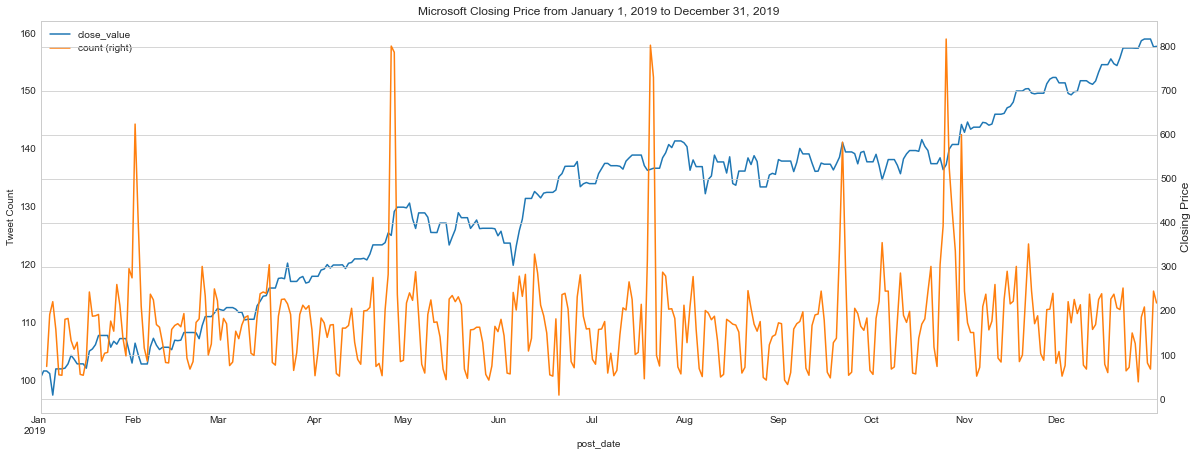

In [41]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20, 8)

ax = msft_values.plot('post_date','close_value', ylabel='Closing Price')
count_tweets.plot('post_date','count',secondary_y=True, ylabel='Tweet Count', ax=ax)

plt.xlabel('January 1 2019 to December 31 2019')
plt.ylabel('Closing Price',fontsize=12)
plt.title('Microsoft Closing Price from January 1, 2019 to December 31, 2019')

plt.show()

We can visually see that there are peaks for number of tweets in February, May, mid-July, mid-September and November. 
We can also see that closing price slightly increased in February, significantly increased in May, no significant impact in mid-July, slight increase in mid-September as well as November.

# **Most Frequent Tokens of Raw Tweets**
- To visualize the most frequent words before data cleaning for sentiment analysis since the original datasets did not come with labelled sentiments

## Unigrams

In [42]:
def plotWordCloud(df):
    '''
    Wordcloud of tweets.
    
    When collations=False, already considers stop words
    '''  
    wordcloud = WordCloud(collocations=False, width=900, height=500, 
                          max_font_size=100, relative_scaling=0.5,normalize_plurals=True).generate(' '.join(df.astype(str)))
    #wordcloud.to_file(output_filename + '.png')
    plt.figure(figsize=(18,14))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

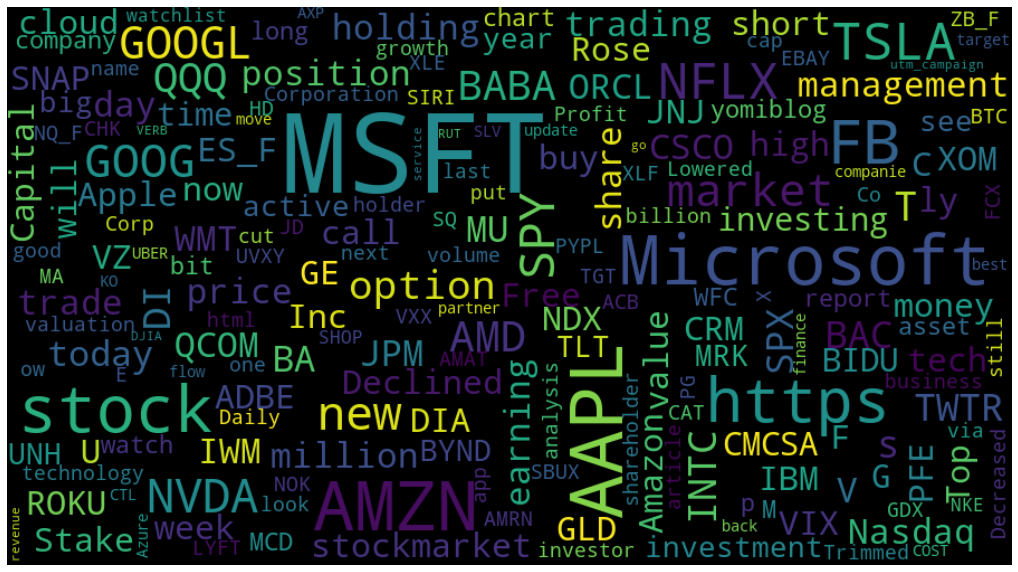

In [43]:
# visualize the most frequent unigrams without filtering any words from tweets in a world cloud
plotWordCloud(msft_tweets['body'])

In [44]:
# Find frequency of each token in dataframe

freq_unigrams = nltk.FreqDist(" ".join(msft_tweets['body']).split())
freq_unigrams_df = pd.DataFrame({'Word': list(freq_unigrams.keys()), 'Count': list(freq_unigrams.values())}).sort_values(by=['Count'], ascending=False)
freq_unigrams_df.head(500)

Word  Count
70      $MSFT  51711
3         the  20595
25         to  18563
92      $AAPL  16404
69      $AMZN  14764
...       ...    ...
5512       Co    414
1138  another    413
1429     $KHC    412
5796   target    411
1474    $twtr    411

[500 rows x 2 columns]

- We can see that there are many stopwords and stock tickers as the top unigrams so they will be dealt with in the data cleaning section later

In [45]:
freq_unigrams_df.describe()

Count
count  141000.000000
mean       11.074184
std       215.096351
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max     51711.000000

- There are 141,000 words where the minimum frequency of a word is one and the maximum frequency of a word occurs 51,711
- Words typically appear, on average, 11 times in this dataset where 75% of the words have a frequency of 2 or less

In [46]:
# Find number of tweets with frequent words above mean
freq_unigrams_df[(freq_unigrams_df['Count'] >= (freq_unigrams_df['Count'].mean()-1) )]

Word  Count
70                         $MSFT  51711
3                            the  20595
25                            to  18563
92                         $AAPL  16404
69                         $AMZN  14764
...                          ...    ...
33770                    trades!     11
63259                        (at     11
49943                  Australia     11
47953                fascinating     11
21107  https://hipstertrader.com     11

[10846 rows x 2 columns]

- There are 10,846 words that have a frequency of the mean (11) and above

### Check for any tickers in the tweets

In [47]:
# Find top 20 ticker symbols in tweets
freq_unigrams_df.loc[freq_unigrams_df['Word'].str.startswith('$', na=False)].sort_values(by=['Count'], ascending=False).head(20)

Word  Count
70    $MSFT  51711
92    $AAPL  16404
69    $AMZN  14764
96      $FB  11734
278   $TSLA   8302
148   $NFLX   8215
152   $NVDA   6822
196    $SPY   6668
68    $GOOG   6370
89   $GOOGL   5766
151    $AMD   5244
698   $INTC   5093
198    $QQQ   5067
277   $BABA   4915
149    $DIS   4618
147   $TWTR   4513
14    $msft   4271
224    $BAC   4258
301     $MU   3924
586    $JPM   3819

- There are a lot of stock tickers mentioned in the tweets that are not part of the original NASDAQ dataset (e.g. FB, SPY, AMD, etc)
- These will need to be removed as they are not meaningful

## Bigrams
- We see that a lot of the top 20 bigrams is a combination of stock tickers which we need to remove for sentiment analysis

In [48]:
# includes stopwords

def freqWords(words):
    words = [w for w in words]
    words = Counter(words).most_common()
    return words

bigram_words = "".join(list(itertools.chain.from_iterable(msft_tweets['body'])))

freq_bigrams = list(ngrams(bigram_words.split(),2))

count_freq_bigrams = freqWords(freq_bigrams)
freq_bigrams_df = pd.DataFrame(count_freq_bigrams).rename(columns ={0:'Bigram', 1: 'Count'})
freq_bigrams_df.head(20)

Bigram  Count
0       ($AAPL, $MSFT)   2381
1         ($FB, $MSFT)   2282
2   (Microsoft, $MSFT)   2231
3       ($AMZN, $MSFT)   1963
4       ($AAPL, $AMZN)   1831
5            (in, the)   1828
6            (of, the)   1795
7       ($AMZN, $TSLA)   1694
8       ($MSFT, $AAPL)   1577
9       ($AAPL, $GOOG)   1573
10      ($AAPL, $NFLX)   1476
11      ($NFLX, $AMZN)   1392
12            (for, a)   1284
13           (on, the)   1263
14      ($GOOG, $INTC)   1166
15          (for, the)   1137
16       ($MSFT, $SPY)   1029
17        ($NDX, $IWM)   1028
18        ($MU, $NFLX)   1024
19      ($AMZN, $NFLX)   1011

- As we are using VADER to label the sentiments, the default lexicon considers individual tokens so we will be using unigrams for sentiment analysis

# **Add New Features**

## Stock Market Dataset

### Stock Market Dataset
Add prev_close, return, price_change, price_class attributes
- **prev_close** is required to calculate close-to-open price change
- **return** is based on 1 day return between previous day's close price and current day's close price
- **price_change** is based on the change between the previous day's close price and current day's open price
- **price_class** has 3 classes based on +/- 0.5 value threshold on price_change:
    - 1 - Up (increase in open price from previous day's price)
    - 0 - No Change
    - -1 - Down (decrease in open price from previous day's price)
<br>
**This classification is required as this will be the target variable (predict stock price movement - up, down or no change).**

In [ ]:
# Drop attributes - TEST ONLY
# df = df.drop(['price_change', 'price_%change', 'prev_close', 'price_class'],axis=1)

In [49]:
# Sort stock market values by date
updated_msft_values = msft_values.sort_values('post_date')
df = updated_msft_values

# Price Change between Previous Day's Closing Value and Current Day's Open Value
# For any null results will be replaced with 0
df['prev_close'] = df['close_value'].shift(1).fillna(0)
df['return'] = ((df['close_value'] - df['prev_close']).fillna(0))
df['price_change'] = ((df['open_value'] - df['prev_close']).fillna(0))
# df['price_%change'] = (((df['price_change'] / df['prev_close'])*100).fillna(0))
# df['price_change'] = ((df['open_value'] - df['prev_close']).groupby(df['ticker_symbol']).diff(periods=1).fillna(0))
# df['price_%change'] = ((df['open_value'] - df['prev_close']).groupby(df['ticker_symbol']).pct_change(1).fillna(0))

# Classes for Price
df['price_class'] = ''
change_values = [1, 0, -1]  # 1 = up, 0 = no change, -1 = down

price_cond = [df['price_change'] >0.5, df['price_change']==0, df['price_change']<-0.5]
df['price_class'] = np.select(price_cond, change_values)

# Sample output
df.tail(2)

ticker_symbol    day_date  close_value    volume  open_value  \
11482          MSFT  2019-12-30       157.59  16356720     158.987   
11481          MSFT  2019-12-31       157.70  18393380     156.770   

       high_value  low_value  post_date  prev_close  return  price_change  \
11482      159.02     156.73 2019-12-30      158.96   -1.37         0.027   
11481      157.77     156.45 2019-12-31      157.59    0.11        -0.820   

       price_class  
11482            0  
11481           -1

In [50]:
# Drop day_date = 12-31-2018 and 12-30-2018 as no longer required

df = df.drop(11733)
df = df.drop(14349)

In [51]:
df.describe()

close_value        volume  open_value  high_value   low_value  \
count   365.000000  3.650000e+02  365.000000  365.000000  365.000000   
mean    130.394534  2.520850e+07  130.365888  131.263964  129.300688   
std      15.048790  8.289380e+06   15.176083   15.105109   15.099837   
min      97.400000  8.989150e+06   99.550000  100.185000   97.200000   
25%     119.280000  1.886000e+07  119.390000  119.590000  118.380000   
50%     135.160000  2.394612e+07  134.950000  136.370000  133.570000   
75%     139.140000  2.973593e+07  140.030000  140.420000  138.250000   
max     158.960000  5.544287e+07  159.450000  159.550000  158.220000   

       prev_close      return  price_change  price_class  
count  365.000000  365.000000    365.000000   365.000000  
mean   130.240753    0.153781      0.125134     0.087671  
std     15.055783    1.312251      1.108022     0.747146  
min     97.400000   -4.690000     -3.600000    -1.000000  
25%    119.190000   -0.130000     -0.470000     0.000000  
50%    134.690000    0.000000      0.120000     0.000000  
75%    139.100000    0.780000      0.670000     1.000000  
max    158.960000    4.530000      5.050000     1.000000

In [52]:
df[df['price_change']==df['price_change'].max()]

# April 25, 2019 had the highest positive change in close-to-open price

ticker_symbol    day_date  close_value    volume  open_value  \
11654          MSFT  2019-04-25       129.15  37927120      130.06   

       high_value  low_value  post_date  prev_close  return  price_change  \
11654      131.37     128.83 2019-04-25      125.01    4.14          5.05   

       price_class  
11654            1

In [53]:
df[df['price_change']==df['price_change'].min()]

# August 5, 2019 had the highest negative change in close-to-open price

ticker_symbol    day_date  close_value    volume  open_value  \
11584          MSFT  2019-08-05       132.21  42749550       133.3   

       high_value  low_value  post_date  prev_close  return  price_change  \
11584    133.9298     130.78 2019-08-05       136.9   -4.69          -3.6   

       price_class  
11584           -1

In [54]:
# Check descriptive stats for price_change based on +/- 0.5 threshold

df[(df['price_change'] >= -0.5) & (df['price_change'] <= 0.5)]['price_change'].describe()

count    159.000000
mean       0.034849
std        0.287981
min       -0.500000
25%       -0.220000
50%        0.030000
75%        0.295000
max        0.490000
Name: price_change, dtype: float64

### Check for Class Distribution including statistical imbalance measure

In [55]:
df['price_class'].value_counts()

 0    159
 1    119
-1     87
Name: price_class, dtype: int64

"\nsns.countplot(df['price_class'])\nplt.title('Price Data Distribution', fontsize=16)\nplt.ylabel('Class Counts', fontsize=16)\nplt.xlabel('Class Label', fontsize=16)\nplt.xticks(rotation='horizontal')\n"

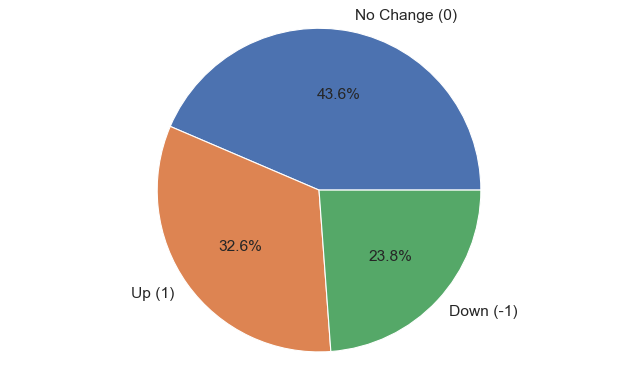

In [94]:
# Plot pie chart of the ratios

fig1, ax1 = plt.subplots(figsize=(10,6), dpi= 80)
ax1.pie(df['price_class'].value_counts().values, labels=['No Change (0)','Up (1)','Down (-1)'], autopct='%1.1f%%', textprops={'fontsize': 14})
# ax1.title.set_text("% Distribution of Stock Price Movement for Microsoft")
ax1.axis('equal')

plt.xticks(rotation='horizontal')

'''
sns.countplot(df['price_class'])
plt.title('Price Data Distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='horizontal')
'''

### Class Imbalance Measure

We will use this quantitative measure of class imbalance from https://dl.acm.org/doi/10.5555/3432601.3432629
- This shows the distribution of relevance and positivity

\begin{align}
imbalance = \sum_{1}^C \left| \frac{1}{C} - \frac{n_c}{(T_{data})} \right| 
\end{align}

where $C$ = total number of classes
<br>
&emsp;&emsp;    $n_{c}$ = count of instances in class $c$
<br>
&emsp;&emsp; $T_{data}$ = total count of instances in dataset
<br>
imbalance = 0 means perfectly balanced data

In [57]:
# set variables for calculation
price_0 = df[df['price_class'] == 0].shape[0]
price_up = df[df['price_class'] == 1].shape[0]
price_down = df[df['price_class'] == -1].shape[0]
price_sum = df['price_class'].count()
C = 3

print('Count for class 0:', price_0)
print('Count for class 1:', price_up)
print('Count for class -1:',  price_down)
print('Total instances:', price_sum)
print('Number of classes:', C)

Count for class 0: 159
Count for class 1: 119
Count for class -1: 87
Total instances: 365
Number of classes: 3


In [58]:
pclass_measure = abs(1/C - price_0/price_sum) + abs(1/C - price_up/price_sum) + abs(1/C - price_down/price_sum)
print('{0:.3f}'.format(pclass_measure))

0.205


Imbalance measure is 0.205 which is not statiscally significant and reflects a relatively balanced dataset.
<br>
Class 0 (no change) has the highest class distribution, followed by class 1 (up) and then class -1 (down).
<br>


#### What if 'no change' class 0 is dropped?

In [59]:
df[df['price_class'] == 0]

ticker_symbol    day_date  close_value    volume  open_value  \
14350          MSFT  2019-01-01       101.57  33161320     101.290   
11729          MSFT  2019-01-07       102.06  35567820     101.640   
11725          MSFT  2019-01-11       102.80  28235260     103.190   
14353          MSFT  2019-01-12       102.80  28235260     103.190   
14354          MSFT  2019-01-13       102.80  28235260     103.190   
...             ...         ...          ...       ...         ...   
14460          MSFT  2019-12-25       157.38   8989150     157.480   
11484          MSFT  2019-12-26       158.67  14526930     157.560   
14461          MSFT  2019-12-28       158.96  18414350     159.450   
14462          MSFT  2019-12-29       158.96  18414350     159.450   
11482          MSFT  2019-12-30       157.59  16356720     158.987   

       high_value  low_value  post_date  prev_close  return  price_change  \
14350    102.4000    100.440 2019-01-01      101.57    0.00        -0.280   
11729    103.2681    100.980 2019-01-07      101.93    0.13        -0.290   
11725    103.4400    101.640 2019-01-11      103.60   -0.80        -0.410   
14353    103.4400    101.640 2019-01-12      102.80    0.00         0.390   
14354    103.4400    101.640 2019-01-13      102.80    0.00         0.390   
...           ...        ...        ...         ...     ...           ...   
14460    157.7100    157.115 2019-12-25      157.38    0.00         0.100   
11484    158.7300    157.400 2019-12-26      157.38    1.29         0.180   
14461    159.5500    158.220 2019-12-28      158.96    0.00         0.490   
14462    159.5500    158.220 2019-12-29      158.96    0.00         0.490   
11482    159.0200    156.730 2019-12-30      158.96   -1.37         0.027   

       price_class  
14350            0  
11729            0  
11725            0  
14353            0  
14354            0  
...            ...  
14460            0  
11484            0  
14461            0  
14462            0  
11482            0  

[159 rows x 12 columns]

In [60]:
new_sum = price_up + price_down
pclass_measure1 = + abs(1/2 - price_up/new_sum) + abs(1/2 - price_down/new_sum)
print('{0:.3f}'.format(pclass_measure1))

0.155


Imbalance measure is 0.155 which is now closer to almost perfectly balanced data.
This would remove 159 instances out of 365 total instances (almost half of the data).
Also, the difference of imbalance measures between 2 classes and 3 classes is small so we will continue with 3 classes.

## Twitter Dataset

### Total Engagement - new feature
- There are many ways to define engagement. Given the dataset, the possible actions of interest considered are comments, retweets and likes. Comments because it drives conversations. Likes because it drives approvals. Retweets because it drives virality (Muñoz-Expósito, 2017).
- Comments, retweets and likes are possible actions of interests are added up to denote interest. When the count of these actions are summed, we will get the engagement level of a tweet. If engagement level is high enough, it may create a 'pump and dump' effect. Pump and dump essentially means sellers artificially boosting stock value temporarily to attract new buyers where they would then sell the stocks at higher prices. If tweets entice buyers to react, this could substantiate the effects of Twitter sentiment analysis. 

In [61]:
# add new attribute: total engagement = comment_num + retweet_num + like_num
# this will be used later on to filter out tweets that will likely have no to minimum impact

tweet_df = msft_tweets

tweet_df['engagement'] = tweet_df['comment_num']+ tweet_df['retweet_num'] + tweet_df['like_num']
tweet_df.sort_values('engagement').head(2)

C:\Users\Home\AppData\Local\Temp/ipykernel_18160/1692100371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['engagement'] = tweet_df['comment_num']+ tweet_df['retweet_num'] + tweet_df['like_num']


tweet_id ticker_symbol         writer  post_date  \
1541901  1079929836196507648          MSFT   DavidYoung66 2019-01-01   
3347564  1112820707807948801          MSFT  InvestorIdeas 2019-04-01   

                                                      body  comment_num  \
1541901  What will be the top company by market cap at ...            0   
3347564  The #AIEYE - Microsoft ( $MSFT), Adobe ( $ADBE...            0   

         retweet_num  like_num  engagement  
1541901            0         0           0  
3347564            0         0           0

#### Check for null values

In [62]:
# check if there are any null values
tweet_df[tweet_df['engagement'].isnull()]

Empty DataFrame
Columns: [tweet_id, ticker_symbol, writer, post_date, body, comment_num, retweet_num, like_num, engagement]
Index: []

#### Other checks

In [63]:
tweet_df.describe()

tweet_id   comment_num   retweet_num      like_num    engagement
count  6.402700e+04  64027.000000  64027.000000  64027.000000  64027.000000
mean   1.147207e+18      0.245334      0.786543      2.110250      3.142128
std    3.798322e+16      1.369349      7.254679     13.267405     19.355694
min    1.079893e+18      0.000000      0.000000      0.000000      0.000000
25%    1.115183e+18      0.000000      0.000000      0.000000      0.000000
50%    1.148955e+18      0.000000      0.000000      0.000000      1.000000
75%    1.182112e+18      0.000000      0.000000      1.000000      2.000000
max    1.212160e+18    165.000000    989.000000    872.000000   1230.000000

There are 64,027 tweets. 75% of the tweets have engagement level of 2 or less. <br> 
This means less than 25% of the tweets are not engaging at all (users are not retweeting, liking or commenting on them). <br>
Box plot and density graph below visually demonstrate the distribution of engagement. They are helpful to determine whether or not calculating the sentiment of that particular tweet would help to assess if there is impact in predicting stock price movement. E.g. if the engagement is 0, we would want to remove those tweets as they do not entice any interest at all (retweet, comment and like), so the likelihood of those tweets having any impact in stock price movement is very small.

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engagement', ylabel='Density'>

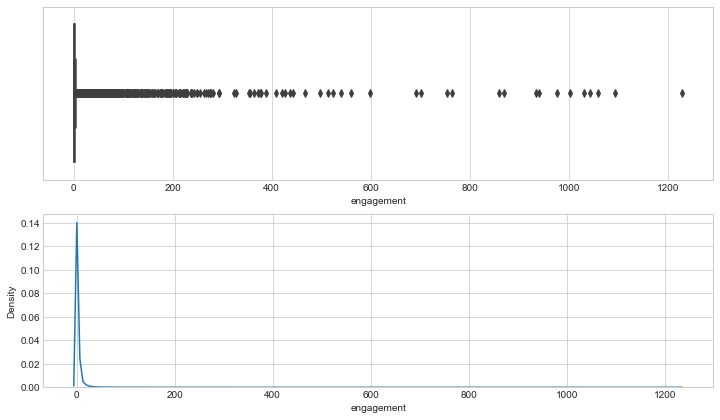

In [64]:
plt.figure(figsize = (12, 7))

plt.subplot(211)
sns.boxplot(tweet_df['engagement'])

plt.subplot(212)
sns.kdeplot(tweet_df['engagement'])

# From the box plot and density graph, we see all the outliers where the highest engagement is more than 1,200 and we do not see a lot of outliers relative to the size of the dataset.
# A lot of the data is concentrated around 0 engagement.

In [65]:
# Check number of tweets with engagement level 100 or over
tweet_df[tweet_df['engagement'] >= 100]['engagement'].count()

# This represents ~0.27% of the tweets dataset to contain highly engaging tweets.

174

In [66]:
# Check number of tweets below mean engagement
tweet_df[tweet_df['engagement'] <= tweet_df['engagement'].mean()]['engagement'].count()

# This represents ~83.4% of the tweets dataset contain engagement levels of approximately 3 (mean) or less.

53423

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engagement', ylabel='Density'>

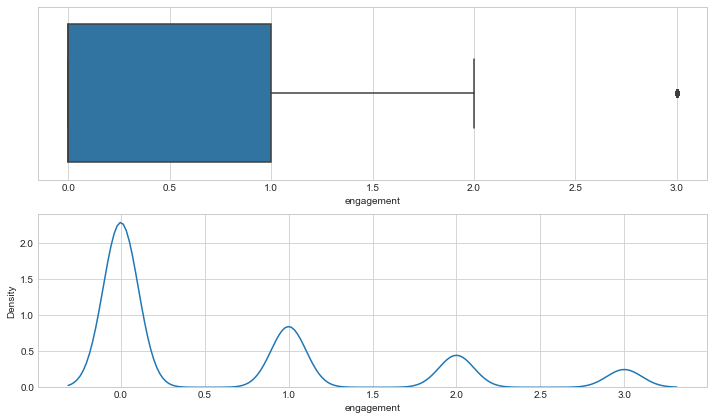

In [67]:
# This box plot will visualize the distribution of tweets that are equal to or less than the mean.
# It is now evenly distributed with one outlier with engagement level of 3.

belowmean_tweets = tweet_df[tweet_df['engagement'] <= tweet_df['engagement'].mean()]

plt.figure(figsize = (12, 7))

plt.subplot(211)
sns.boxplot(belowmean_tweets['engagement'])

plt.subplot(212)
sns.kdeplot(belowmean_tweets['engagement'])

In [68]:
# Check number of tweets that have 0 engagement

# tweet_df[tweet_df['engagement'] == 0]
tweet_df[tweet_df['engagement'] == 0]['engagement'].count()

# Approx. 50% of the tweets have 0 engagement.

31982

#### 0 Engagement Removed

In [69]:
# See if outliers reduced when 0 engagement removed

eng_df = tweet_df[tweet_df['engagement'] != 0]

eng_df.describe()

tweet_id   comment_num   retweet_num      like_num    engagement
count  3.204500e+04  32045.000000  32045.000000  32045.000000  32045.000000
mean   1.151300e+18      0.490186      1.571540      4.216352      6.278078
std    3.710083e+16      1.904358     10.194371     18.515592     26.997640
min    1.079893e+18      0.000000      0.000000      0.000000      1.000000
25%    1.121389e+18      0.000000      0.000000      1.000000      1.000000
50%    1.152115e+18      0.000000      0.000000      1.000000      2.000000
75%    1.186343e+18      1.000000      1.000000      3.000000      5.000000
max    1.212160e+18    165.000000    989.000000    872.000000   1230.000000

Removing tweets that have 0 engagement reduced the dataset significantly from 64027 to 32045, which is approx. 50%. <br>
75% of the tweets have engagement levels between 1 and 5 and mean increased from ~3 to ~6.

In [70]:
eng_df.sample()

tweet_id ticker_symbol writer  post_date  \
3343913  1100403217479991296          MSFT  kubsv 2019-02-26   

                                                      body  comment_num  \
3343913  Microsoft and VMware Working on Cloud Partners...            0   

         retweet_num  like_num  engagement  
3343913            0         1           1

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engagement', ylabel='Density'>

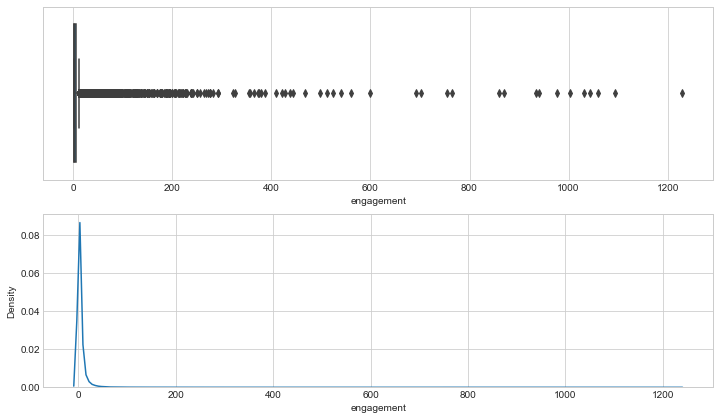

In [71]:
plt.figure(figsize = (12, 7))

plt.subplot(211)
sns.boxplot(eng_df['engagement'])

plt.subplot(212)
sns.kdeplot(eng_df['engagement'])

We see that the box plot is similar before removing tweets with 0 engagement level.

#### Drop the columns that add up to engagement

In [72]:
eng_df.drop(['comment_num', 'retweet_num', 'like_num'], axis=1, inplace=True)

#axis = 1 means a column is being dropped (if row, axis = 0)

eng_df

C:\Users\Home\AppData\Local\Temp/ipykernel_18160/823348486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_df.drop(['comment_num', 'retweet_num', 'like_num'], axis=1, inplace=True)


tweet_id ticker_symbol           writer  post_date  \
1541930  1079976053349572608          MSFT         DZierler 2019-01-01   
1541942  1080029412660310022          MSFT     CryptoMichNL 2019-01-01   
1542034  1080124854987313153          MSFT   PennyStockPlan 2019-01-01   
1542057  1080140795951251456          MSFT         DZierler 2019-01-01   
1542080  1080153406331908097          MSFT  PennyStockRally 2019-01-01   
...                      ...           ...              ...        ...   
3378065  1212116475210649600          MSFT       innersigma 2019-12-31   
3378066  1212116539278798848          MSFT        LadeBackk 2019-12-31   
3378069  1212122611192336394          MSFT        LadeBackk 2019-12-31   
3378070  1212131912585826305          MSFT       robintrack 2019-12-31   
3378071  1212145214736875520          MSFT   MarketCurrents 2019-12-31   

                                                      body  engagement  
1541930  My Top Ten #AR #VR Predictions for 2019:http:/...           3  
1541942  December PerformersCrypto:$BTC -0.3%$ETH +20.2...         153  
1542034  If you're interested in swing-trading options,...           3  
1542057  It’s a new year!Time for my 2019 #AR #VR #Voic...           4  
1542080  If you're interested in swing-trading options,...           2  
...                                                    ...         ...  
3378065  My winning trades today were $DIS $HD $IBM $MS...           1  
3378066                               $MSFT Monster close            1  
3378069  $MSFT check the timestamp.... buy the dip and ...           4  
3378070  Top increases in popularity for stocks held by...           2  
3378071  $AAPL $MSFT $JPM - Apple, Microsoft top Dow 20...           2  

[32045 rows x 6 columns]

### Length of Body - new feature
- Since the maximum characters allowed for tweets is 280, check if any tweets exist this limit.
- There may be tweets longer the allowed maximum due to long links, hashtags, mentions, etc.

In [73]:
# Check length of tweets and add new column
eng_df['len_body'] = eng_df['body'].str.len() 
eng_df.head()

C:\Users\Home\AppData\Local\Temp/ipykernel_18160/3504467659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_df['len_body'] = eng_df['body'].str.len()


tweet_id ticker_symbol           writer  post_date  \
1541930  1079976053349572608          MSFT         DZierler 2019-01-01   
1541942  1080029412660310022          MSFT     CryptoMichNL 2019-01-01   
1542034  1080124854987313153          MSFT   PennyStockPlan 2019-01-01   
1542057  1080140795951251456          MSFT         DZierler 2019-01-01   
1542080  1080153406331908097          MSFT  PennyStockRally 2019-01-01   

                                                      body  engagement  \
1541930  My Top Ten #AR #VR Predictions for 2019:http:/...           3   
1541942  December PerformersCrypto:$BTC -0.3%$ETH +20.2...         153   
1542034  If you're interested in swing-trading options,...           3   
1542057  It’s a new year!Time for my 2019 #AR #VR #Voic...           4   
1542080  If you're interested in swing-trading options,...           2   

         len_body  
1541930       268  
1541942       253  
1542034       258  
1542057       277  
1542080       264

In [74]:
eng_df.describe()

tweet_id    engagement      len_body
count  3.204500e+04  32045.000000  32045.000000
mean   1.151300e+18      6.278078    183.698330
std    3.710083e+16     26.997640     93.669278
min    1.079893e+18      1.000000      5.000000
25%    1.121389e+18      1.000000    105.000000
50%    1.152115e+18      2.000000    189.000000
75%    1.186343e+18      5.000000    268.000000
max    1.212160e+18   1230.000000    688.000000

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='len_body', ylabel='Density'>

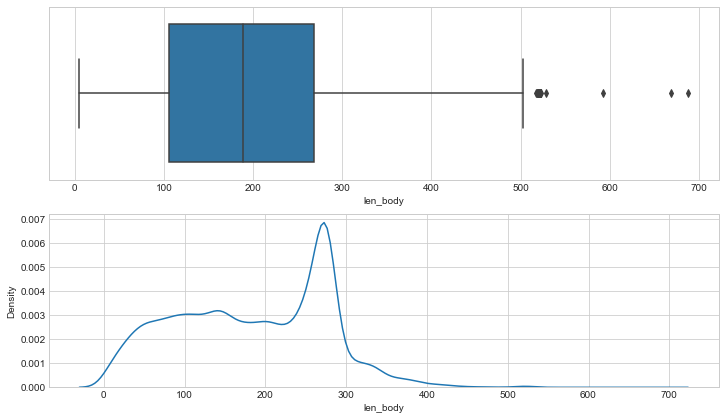

In [75]:
# Box plot and density graph of length of tweets

plt.figure(figsize = (12, 7))

plt.subplot(211)
sns.boxplot(eng_df['len_body'])

plt.subplot(212)
sns.kdeplot(eng_df['len_body'])

In [76]:
# Check number of tweets exceeding 280 character limit
eng_df[eng_df['len_body'] > 280]['len_body'].count()

# Approx. 10.3% of the tweets exceed the allowed 280 characters.

3285

In [77]:
# Check number of tweets below mean
eng_df[eng_df['len_body'] < eng_df['len_body'].mean()]['len_body'].count()

15568

In [78]:
eng_df[eng_df['len_body']==eng_df['len_body'].min()]

# There are 227 tweets that have the lowest character length. From below, most of them are just ticker names.

tweet_id ticker_symbol           writer  post_date   body  \
3338072  1080876183305285632          MSFT           kpak82 2019-01-03  $MSFT   
3338308  1082306881111183361          MSFT  carlquintanilla 2019-01-07  $MSFT   
3338604  1083577338158288896          MSFT     Mikes_Charts 2019-01-11  $MSFT   
3339129  1085876169843634178          MSFT  carlquintanilla 2019-01-17  $MSFT   
3339176  1085957435540434944          MSFT     PrometheusAM 2019-01-17  $MSFT   
...                      ...           ...              ...        ...    ...   
3377095  1207358203387949056          MSFT        CCM_Brett 2019-12-18  $MSFT   
3377279  1208023045081726978          MSFT             fm23 2019-12-20  $MSFT   
3377280  1208026783507001350          MSFT     TradingHaven 2019-12-20  $MSFT   
3377625  1210218643482664960          MSFT     InfinitusCap 2019-12-26  $MSFT   
3377936  1211692628250701824          MSFT      AdoAjanovic 2019-12-30  $MSFT   

         engagement  len_body  
3338072          12         5  
3338308           3         5  
3338604           2         5  
3339129          25         5  
3339176           1         5  
...             ...       ...  
3377095           2         5  
3377279           3         5  
3377280           1         5  
3377625           1         5  
3377936           2         5  

[227 rows x 7 columns]

In [79]:
eng_df[eng_df['len_body']==eng_df['len_body'].max()]

tweet_id ticker_symbol       writer  post_date  \
3370646  1187392463276654592          MSFT  WebVenture1 2019-10-24   

                                                      body  engagement  \
3370646  $MSFT nearing HOD, trying to bust through $140...           2   

         len_body  
3370646       688

In [80]:
# Check the tweet with the highest character length
eng_df['body'][3370646]

# tweet is long due to long hyperlink

'$MSFT nearing HOD, trying to bust through $140 - strong resistance above, has failed multiple times, see if it can hold and move higher this time.$MSFT | Check Out My Customized Interactive Chart #stocks https://barchart.com/social/share?t=MSFT%20%7C%20Custom%20Interactive%20Chart%20for%20Microsoft%20Corp&d=Build%20and%20share%20your%20own%20charts%20with%20sophisticated%20technical%20studies%20and%20indicators%20for%20equities%2C%20futures%2C%20and%20more.&i=i_1571931384_325675329&r=https%3A%2F%2Fwww.barchart.com%2Fshared-chart%2FMSFT%3Fchart_url%3Di_1571931384_325675329%26page_url%3D%252Fstocks%252Fquotes%252FMSFT%252Finteractive-chart%253Fid%253D1493664&du=false… via @Barchart'

### Add New Attributes - empty
- This is in preparation for storing clean tweets after data cleaning and sentiments.

In [81]:
tweet_df['clean_body'] = ''
tweet_df['len_cleanbody'] = ''
tweet_df['pos_raw'] = ''
tweet_df['neg_raw'] = ''
tweet_df['neu_raw'] = ''
tweet_df['comp_raw'] = ''
tweet_df['sent_class_raw'] = ''
tweet_df['pos_clean'] = ''
tweet_df['neg_clean'] = ''
tweet_df['neu_clean'] = ''
tweet_df['comp_clean'] = ''
tweet_df['sent_class_clean'] = ''

C:\Users\Home\AppData\Local\Temp/ipykernel_18160/2798979449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['clean_body'] = ''
C:\Users\Home\AppData\Local\Temp/ipykernel_18160/2798979449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['len_cleanbody'] = ''
C:\Users\Home\AppData\Local\Temp/ipykernel_18160/2798979449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

# **Merge Datasets for Correlation - Pearson Correlation (filter method)**
- Put the 2 datasets into one combined dataset
- Correlation (such as Pearson) is typically used for feature selection as well as dimensionality reduction purposes for linear models.
- Pearson correlation is the measure of linear relationship between features.
- Typically, attributes that have high correlation with the target attribute should be considered. However, attributes that are highly correlated together, between features and not with target attribute, should be removed because they would be redundant (no significant information would be lost).

In [82]:
merged_df = pd.merge(eng_df, df, on=['post_date','ticker_symbol'],how='inner')
merged_df.head(2)

tweet_id ticker_symbol        writer  post_date  \
0  1079976053349572608          MSFT      DZierler 2019-01-01   
1  1080029412660310022          MSFT  CryptoMichNL 2019-01-01   

                                                body  engagement  len_body  \
0  My Top Ten #AR #VR Predictions for 2019:http:/...           3       268   
1  December PerformersCrypto:$BTC -0.3%$ETH +20.2...         153       253   

     day_date  close_value    volume  open_value  high_value  low_value  \
0  2019-01-01       101.57  33161320      101.29       102.4     100.44   
1  2019-01-01       101.57  33161320      101.29       102.4     100.44   

   prev_close  return  price_change  price_class  
0      101.57     0.0         -0.28            0  
1      101.57     0.0         -0.28            0

In [83]:
# Remove day_date as post_date already exists

merged_df.drop(['day_date'], axis=1, inplace=True)

merged_df.head(2)

tweet_id ticker_symbol        writer  post_date  \
0  1079976053349572608          MSFT      DZierler 2019-01-01   
1  1080029412660310022          MSFT  CryptoMichNL 2019-01-01   

                                                body  engagement  len_body  \
0  My Top Ten #AR #VR Predictions for 2019:http:/...           3       268   
1  December PerformersCrypto:$BTC -0.3%$ETH +20.2...         153       253   

   close_value    volume  open_value  high_value  low_value  prev_close  \
0       101.57  33161320      101.29       102.4     100.44      101.57   
1       101.57  33161320      101.29       102.4     100.44      101.57   

   return  price_change  price_class  
0     0.0         -0.28            0  
1     0.0         -0.28            0

In [84]:
# CSV file of merged dataset (no sentiment labels yet)

merged_df.to_csv('./Output/merged_df.csv', index=False)

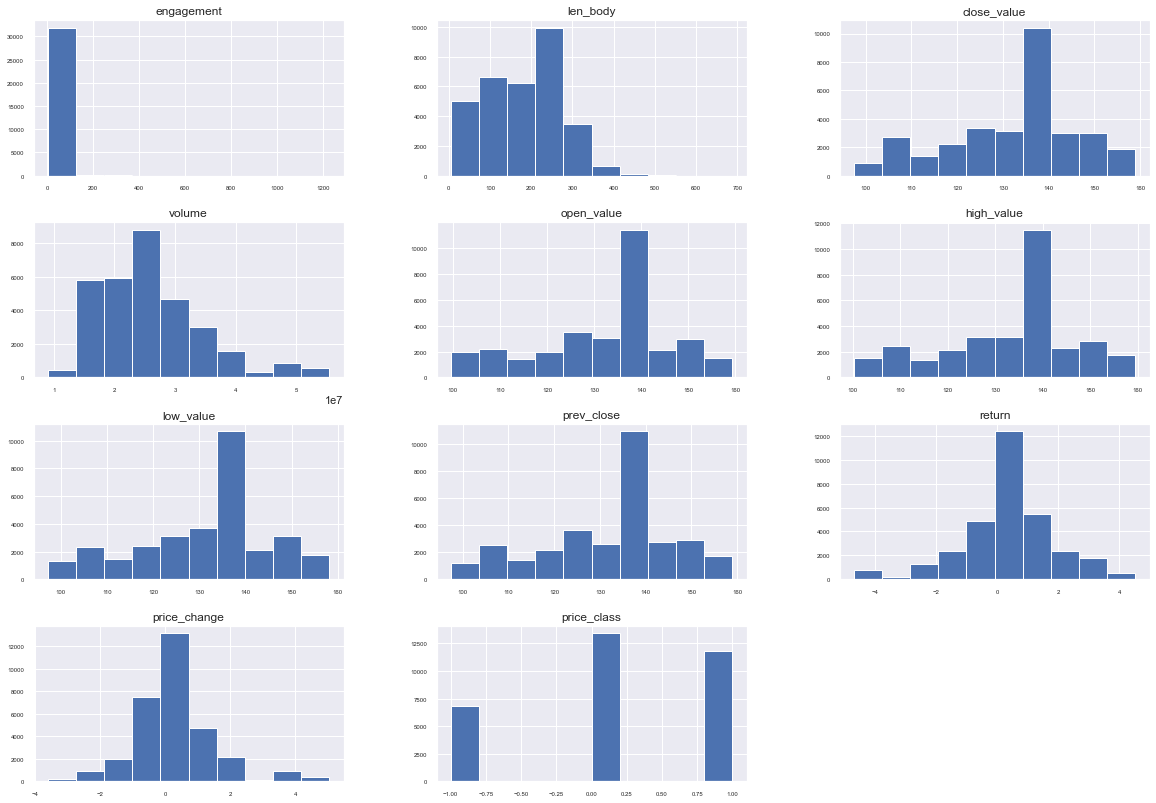

In [85]:
# Plot Frequency Histograms of numerical features (including categorical coded numerical ones)

sns.set()
merged_df.drop(['tweet_id', 'post_date'],axis=1).hist(sharex = False, sharey = False, xlabelsize = 6, ylabelsize = 6, figsize=(20, 14))
plt.show()

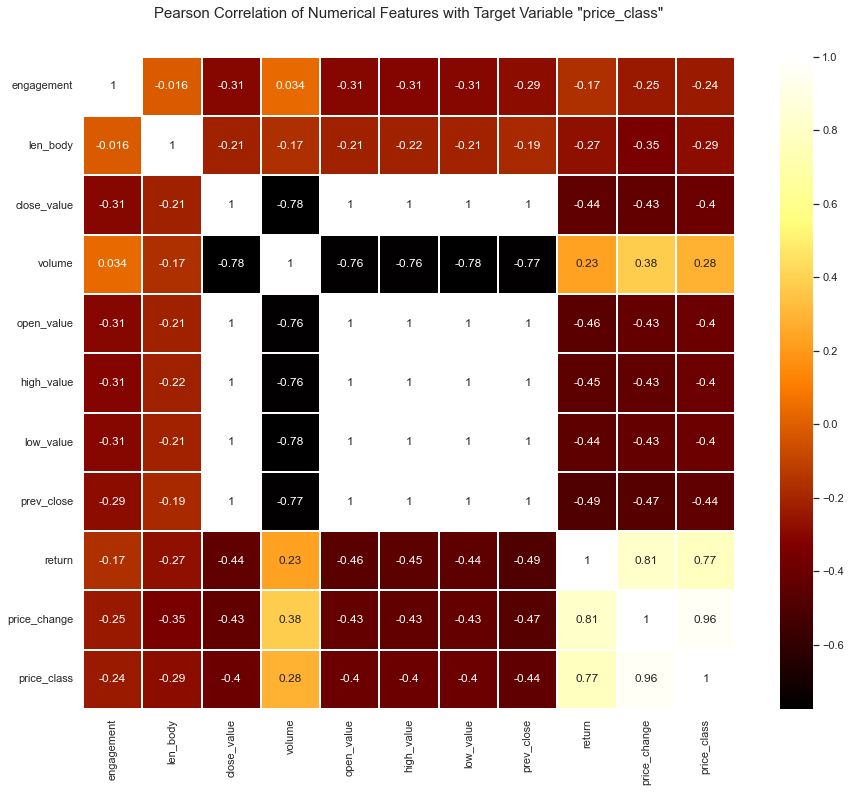

In [86]:
# Correlation Matrix

corr_df=merged_df.corr()
heatmap_df=corr_df.drop(['tweet_id']).drop([
    'tweet_id'],axis=1)
#'prev_close', 'price_class
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson Correlation of Numerical Features with Target Variable "price_class"', y=1.05, size=15)
sns.heatmap(heatmap_df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

'close_value', 'open_value', 'high_value', 'low_value' and 'prev_close' have perfect positive correlation with one another. These features may be removed as they may not convey significant information gain for modelling. <br>
'volume' has the highest absolute correlation with the features mentioned above. <br>
'price_class' (target feature) has strong positive correlation with 'price_change'. This feature may be removed as it may not, again, convey significant information gain, especially that 'price_class' was calculated based on 'price_change'. <br>
'price_class' has strong positive correlation with 'return'. 'return' can be used to predict 'price_class' when comparing the effects between stock price trend predictions with and without sentiments. The stock market features that were mentioned initially have moderately negative correlation with 'price_class' at ~-0.4. 'price_class' has the absolute lowest correlation with 'engagement' (negative correlation at -0.24), followed by 'volume' (positive correlation at 0.28) and 'len_body' (negative correlation at -0.29).
<br>

# **Sentiment Analysis on Raw Tweets**
- Calculate sentiment values of tweets without doing anything to them so that we can compare the distribution of the classification after data cleaning.
- Use +/- 0.5 as threshold to classify sentiment of tweets as positive (1), negative (-1) or nuetral (0)

In [87]:
analyzer = SentimentIntensityAnalyzer()

def sentimentScore(tweets):
    '''
    Calculate Vader polarity scoles for each tweet
    '''
    
    scores = analyzer.polarity_scores(tweets)
    return scores

In [88]:
# Apply the sentimentScore() function
merged_df['sentiment'] = merged_df['body'].apply(analyzer.polarity_scores)

merged_df['comp_raw'] = [c['compound'] for c in merged_df['sentiment']]
merged_df['pos_raw'] = [c['pos'] for c in merged_df['sentiment']]
merged_df['neg_raw'] = [c['neg'] for c in merged_df['sentiment']]
merged_df['neu_raw'] = [c['neu'] for c in merged_df['sentiment']]

In [89]:
merged_df.head(2)

tweet_id ticker_symbol        writer  post_date  \
0  1079976053349572608          MSFT      DZierler 2019-01-01   
1  1080029412660310022          MSFT  CryptoMichNL 2019-01-01   

                                                body  engagement  len_body  \
0  My Top Ten #AR #VR Predictions for 2019:http:/...           3       268   
1  December PerformersCrypto:$BTC -0.3%$ETH +20.2...         153       253   

   close_value    volume  open_value  ...  low_value  prev_close  return  \
0       101.57  33161320      101.29  ...     100.44      101.57     0.0   
1       101.57  33161320      101.29  ...     100.44      101.57     0.0   

   price_change  price_class  \
0         -0.28            0   
1         -0.28            0   

                                           sentiment comp_raw  pos_raw  \
0  {'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp...   0.2714    0.063   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000    0.000   

   neg_raw  neu_raw  
0      0.0    0.937  
1      0.0    1.000  

[2 rows x 21 columns]

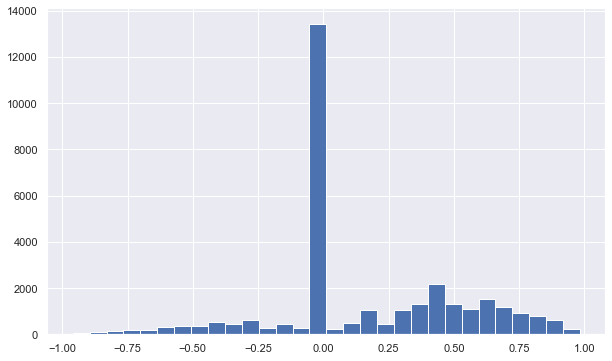

In [90]:
# Frequency for Compound Score
plt.figure(figsize=(10,6)) 
hist_comp = plt.hist(merged_df['comp_raw'],bins=30)

# A lot of the tweets have a compound score around 0 (at least 13K tweets).

In [91]:
# Define tresholds for sentimental classes
# merged_df['sent_class_raw'] = ''
sent_values = [1, -1]  # 1 = pos , 0 = neutral, -1 = neg

sent_cond = [merged_df['comp_raw'] >0.5, merged_df['comp_raw']<-0.5]
merged_df['sent_class_raw'] = np.select(sent_cond, sent_values)


# Sample output
merged_df.sample()

tweet_id ticker_symbol     writer  post_date  \
18566  1161690086766993408          MSFT  SteHaller 2019-08-14   

                                                    body  engagement  \
18566  A nice 3 SD move in $SPY.More in my #ebooks:ht...           1   

       len_body  close_value    volume  open_value  ...  prev_close  return  \
18566       278       133.98  32527250      136.36  ...       138.6   -4.62   

       price_change  price_class  \
18566         -2.24           -1   

                                               sentiment  comp_raw pos_raw  \
18566  {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...    0.4215   0.064   

       neg_raw  neu_raw  sent_class_raw  
18566      0.0    0.936               0  

[1 rows x 22 columns]

In [92]:
# descriptive statistics of sentiment classification of raw tweets
merged_df.groupby('sent_class_raw')['comp_raw'].describe().unstack(1)

       sent_class_raw
count  -1                 1321.000000
        0                23759.000000
        1                 6965.000000
mean   -1                   -0.659507
        0                    0.065531
        1                    0.690334
std    -1                    0.113677
        0                    0.213889
        1                    0.119544
min    -1                   -0.960300
        0                   -0.499500
        1                    0.500600
25%    -1                   -0.743000
        0                    0.000000
        1                    0.598300
50%    -1                   -0.629300
        0                    0.000000
        1                    0.669700
75%    -1                   -0.557400
        0                    0.202300
        1                    0.780900
max    -1                   -0.501600
        0                    0.499700
        1                    0.983600
dtype: float64

(array([], dtype=float64), [])

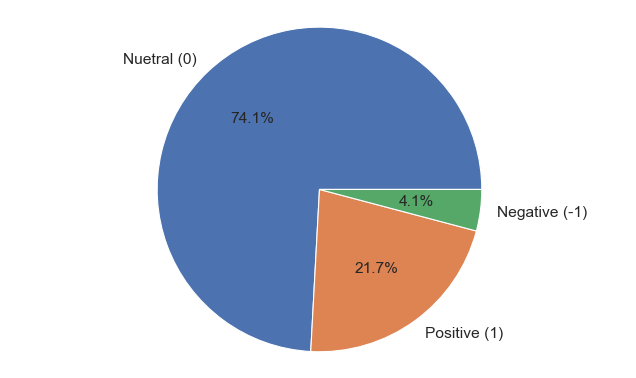

In [93]:
# Plot pie chart of the ratios

fig1, ax1 = plt.subplots(figsize=(10,6), dpi= 80)
ax1.pie(merged_df['sent_class_raw'].value_counts().values, labels=['Nuetral (0)','Positive (1)','Negative (-1)'], autopct='%1.1f%%', textprops={'fontsize': 14})
# ax1.title.set_text("% Distribution of Stock Price Movement for Microsoft")
ax1.axis('equal')
plt.xticks(rotation='horizontal')

### Calculate the imbalance measure

In [95]:
# set variables for calculation
sentraw_neu = merged_df[merged_df['sent_class_raw'] == 0].shape[0]
sentraw_pos = merged_df[merged_df['sent_class_raw'] == 1].shape[0]
sentraw_neg = merged_df[merged_df['sent_class_raw'] == -1].shape[0]
sentraw_sum = merged_df['sent_class_raw'].count()
C = 3

print('Count for neutral sentiment class:', sentraw_neu)
print('Count for positive sentiment class:', sentraw_pos)
print('Count for negative sentiment class:',  sentraw_neg)
print('Total instances:', sentraw_sum)
print('Number of classes:', C)

Count for neutral sentiment class: 23759
Count for positive sentiment class: 6965
Count for negative sentiment class: 1321
Total instances: 32045
Number of classes: 3


In [96]:
srclass_measure = abs(1/C - sentraw_neu/sentraw_sum) + abs(1/C - sentraw_pos/sentraw_sum) + abs(1/C - sentraw_neg/sentraw_sum)
print('{0:.3f}'.format(srclass_measure))

0.816


This is highly imbalanced so data cleaning (and augmenting if required) will definitely be helpful to improve the distribution of classes.

### Correlation
- Check correlation including the new sentiment attributes

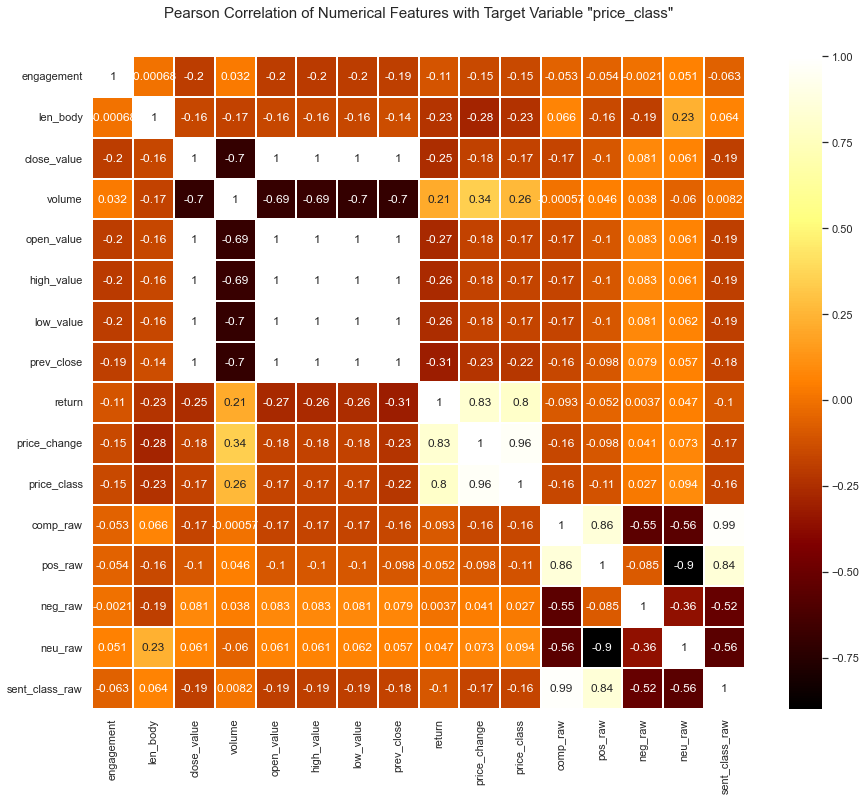

In [97]:
# Correlation Matrix

corr_df=merged_df.corr()
heatmap_df=corr_df.drop(['tweet_id']).drop([
    'tweet_id'],axis=1)
#'prev_close', 'price_class
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson Correlation of Numerical Features with Target Variable "price_class"', y=1.05, size=15)
sns.heatmap(heatmap_df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

Some of the features (mostly stock market data, engagement and length of tweets) were analyzed so now let's consider the sentiments as well. <br>

'price_class' has very weak absolute correlation with all the sentiment related features ('comp_raw', 'pos_raw', 'neg_raw', 'neu_raw', 'sent_class_raw'). It is interesting that neg_raw and neu_raw have positive correlation while the others negative. <br>

The correlation between the other features (sentiment related) show that:
- 'comp_raw' has a strong positive correlation with 'pos_raw' and almost perfect correlation with 'sent_class_raw'. One of 'comp_raw' or 'sent_class_raw' may be dropped due to redundancy. It is interesting that the class with the highest distribution (neutral) did not have the highest correlation.
- 'pos_raw' and 'neg_raw' have the weakest absolute correlation.
- 'pos_raw' and 'neu_raw' has a high negative correlation at -0.9.


Since the sentiment related features have close to zero correlation with the target feature, 'price_class', ANOVA and Random Forest will be later assessed for feature importance and/or selection. <br>
ANOVA measures the impact of independent variables on the target variable. More specifically, F-statistic will be used to determine whether the means of different samples are statistically significant or not (where lower means sample means are moer similar). <br>
In addition, random forests are typically used for feature selection too. Random forest is made up of individual trees and at each tree, the attributes are ranked based on GINI or Information Gain. 

# **Special Characters, Hyperlinks, Stopwords, Lemmatization and Tokenization**
- Tweets were converted to lowercase (increases negative sentiment by 1%) and punctuations. Slangs were not removed as they contribute to the VADER scoring (i.e. increases magnitude)
- Removal steps (substitute with space otherwise noted): mentions -> hashtags -> hyperlinks -> stock symbols starting with $ -> words that contain 2 or less characters -> tweets that start with RT -> additional spaces -> strip tweets -> special characters as tweets contain text only -> lowercase tweets -> lemmatize tweets -> stopwords removed -> cleaning done

In [98]:
def cleanTweets(tweet):
    '''
    Cleans tweets (based on the filters below, tokenization and lemmanization).
    Returns tweets with specified substrings removed.
    '''
    stop_words = set(sw.words('english'))

# based on the most frequent words
    add_stop_words = ['microsoft', 'apple', 'google', 'tesla', 'amazon', 'Microsoft', 'Apple', 'netflix', 'disney', 'amzn', 'bezos',
                     'Google', 'Tesla', 'Amazon', 'APPLE', 'MICROSOFT', 'GOOGLE', 'TESLA', 'msft', 'corporation', 'facebook', 'aapl', 'spx',
                    'AMAZON', 'nasdaq', 'NASDAQ', 'stock', 'dow', 'doj', 'fang', 'faang', 'day', 'market', 'today', 'linkedin', 'googl',
                     '&', 'Â»', 'free', 'Inc.', 'Corporation', '|', ':', '(', 'Daily--FREE!', "it's", '>', 'Corporation$MSFT', 'Inc.$AAPL', "Microsoft's", 'Co.', 
                      'Co', "I'm", '=', 'Corp.', 'Company', '/', 'â€“', '--', 'Inc.$AMZN', 'x', 'S&P', '$MSFT)', '500', 'Facebook', '(Nasdaq:', 'itâ€™s', 
                      'Iâ€™m', 'BlackBerry', "here's", ')', 'Inc', 'join', 'donâ€™t', 'â€”', 'â€¦', '(MSFT)', 'Microsoftâ€™s', 'Morning', '~', 'w', 
                      'link', 'Alphabet', 'promo', 'subscribe', 'subscriber', 'subscribes', 'subscribers'] #'promo', 'subscribe', 'free trading', 'Facebook']
    stop_words.update(add_stop_words)


# add_stop_words = ['microsoft', 'apple', 'google', 'tesla', 'amazon', 'Microsoft', 'Apple',
#                     'Google', 'Tesla', 'Amazon', 'APPLE', 'MICROSOFT', 'GOOGLE', 'TESLA',
#                    'AMAZON', 'nasdaq', 'NASDAQ', 'stock', 'dow', 'doj', 'fang', 'faang', 'day', 'market', 'today'] #'promo', 'subscribe', 'free trading', 'Facebook']

    # Remove mentions 
    # tweet = re.sub(r'[@]\b\w{0,50}\b', ' ', tweet)
    tweet = re.sub('@[A-Za-z0-9]+',' ',tweet)
    # Remove hashtags
    #tweet = re.sub(r'#([^\s]+)', r' ', tweet)
    tweet = re.sub(r'#\w+',' ',tweet)
    # Remove links
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    # Remove stock symbols (up to 5 characters)
    tweet = re.sub(r'[$]\b\w{0,10}\b', ' ', tweet)
    # Remove words that contain 2 or less characters
    tweet = re.sub(r'\b\w{0,2}\b', ' ', tweet)
    # Remove retweet text "RT"
    tweet = re.sub('^RT[\s]+',' ',tweet)
    # Remove special characters if 1 or less
    tweet = re.sub(r'\s+([?.!"])', r'\1', tweet)
    # Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    # Remove extra punctuations beyond 2
    # tweet = re.sub(r'(!|.|%)2+', '', tweet)
    # Replace #text with text
    # tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    # Trim
    tweet = tweet.strip('\'"')
    
                                                   
    # Remove apostrophes
    #tweet = re.sub(r"'",'',tweet)
    #tweet = re.sub(r'"','',tweet)
    #tweet = re.sub(r"`",'',tweet)
    
    # Remove special characters symbols  <-- used due to lack of emoticons in the tweets
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    
    word_tokens = wt(tweet)
    #stripped = word_tokens.strip(string.punctuation)
 
    # Append to string to filter via NLTK
    modified_tweet = []
 
    #looping through conditions
    for w in word_tokens:
        # Change to lowercase .. this increases negative class by 1%
        w = w.lower()
        # Lemmanization
        w = wnl.lemmatize(w)
        # Check tokens against stop words
        
        # Remove all trailing and leading punctuation if more than 2 (likely an emoticon)
        #if len(word_tokens) <= 2:
        #    word_tokens
        #if len(word_tokens) > 2:
        #    stripped
        if w not in stop_words:
            modified_tweet.append(w)
    return ' '.join(modified_tweet)

In [99]:
np.random.seed(0)
merged_df['body'].sample(2)

12798    https://seekingalpha.com/news/3275025-b2digita...
3075     $LEAS JUMPS 300% ON HUG VOLUME. Look for dips ...
Name: body, dtype: object

#### Quick cleanTweets() Check

In [100]:
# BEFORE
test_text = merged_df['body'][3075]

test_text

'$LEAS JUMPS 300% ON HUG VOLUME. Look for dips to enter this one. $WDBG $KATX $NOUV $SHLDQ $RNVA $MSPC $HPIL $CSOC $SHMP $NSAV $ACB $SGCP $VAPE $ZNGY $DRUS $BLSP $SBES $AAPL $TSLA $FB $DSCR $MSFT $BGFT $DMHI $LVGI $AMZN $BIOAQ $FUSZ $MGTI $BRK.B $NNRX $HRI $TXHE $VYST $APYP'

In [101]:
# AFTER
testtest = cleanTweets(test_text)
testtest

'jump hug volume look dip enter one'

#### Execute cleanTweets()

In [102]:
# apply the cleanTweets() on the modify_body column 
merged_df['modify_body'] = merged_df['body']
merged_df['modify_body'] = merged_df['modify_body'].apply(cleanTweets)

In [103]:
# To see positions of features so we can compare raw tweets with clean tweets
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32045 entries, 0 to 32044
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        32045 non-null  int64         
 1   ticker_symbol   32045 non-null  object        
 2   writer          31882 non-null  object        
 3   post_date       32045 non-null  datetime64[ns]
 4   body            32045 non-null  object        
 5   engagement      32045 non-null  int64         
 6   len_body        32045 non-null  int64         
 7   close_value     32045 non-null  float64       
 8   volume          32045 non-null  int64         
 9   open_value      32045 non-null  float64       
 10  high_value      32045 non-null  float64       
 11  low_value       32045 non-null  float64       
 12  prev_close      32045 non-null  float64       
 13  return          32045 non-null  float64       
 14  price_change    32045 non-null  float64       
 15  pr

In [104]:
np.random.seed(1)
merged_df.iloc[:, [4, 22]].sample(5)

body  \
29645  *bursts into crowded room, holding up options ...   
25656  Afterhours snapshot of the #darkpool feed:  $g...   
29246  How To Find Bull Call Spreads in $MSFT and $TS...   
27542  $CRM $MSFT - Salesforce moving Marketing Cloud...   
3722   $MSFT so far 112.5 is good resistance. If over...   

                                             modify_body  
29645  burst crowded room holding option chart expira...  
25656                           afterhours snapshot feed  
29246                      find bull call spread example  
27542            salesforce moving marketing cloud azure  
3722   far good resistance overcome either monthly ch...

In [105]:
merged_df['body'][3722]

'$MSFT so far 112.5 is good resistance. If overcome 121-125 then, Either monthly chart will adjust to higher prices or this will come down. Not tmrw or immediately but i guess when market is ready for its next shake down. @PeterTrader99 immediate support 110 ,resistance 112.5 -115'

In [106]:
merged_df['modify_body'][3722]

'far good resistance overcome either monthly chart adjust higher price come tmrw immediately guess ready next shake immediate support resistance'

## Remove tweets without any text after cleaning (no sentiment can be properly calculated)

In [107]:
merged_df[merged_df['modify_body'] =='']['modify_body'].count()

1720

In [108]:
# Drop empty clean tweets due to no sentiment scores can be calculated
merged_df = merged_df[~(merged_df['modify_body'] == '')]

In [109]:
merged_df[merged_df['modify_body'] =='']['modify_body'].count()

0

In [110]:
# Number of tweets in the dataset after removing empty tweets post cleaning
merged_df['modify_body'].count()

30325

## Check for null writers
- writer column with null values will not be removed as this feature is not relevant for the purpose of this project.
- this feature to be dropped along with tweet_id and ticker_symbol

In [111]:
merged_df_no_null = merged_df[merged_df['writer'].isna()]

np.random.seed(0)
merged_df_no_null.sample(3)
#merged_df_no_null.iloc[:, [2, 8, 27, 20, 26]].sort_values(by=['engagement'],ascending=False)

tweet_id ticker_symbol writer  post_date  \
21966  1176907308778934272          MSFT    NaN 2019-09-25   
22261  1178745851604127747          MSFT    NaN 2019-09-30   
27934  1196418439977590790          MSFT    NaN 2019-11-18   

                                                    body  engagement  \
21966  "ElectionGuard is touted by $MSFT as a system ...           5   
22261  $AAPL $GOOGL $GOOG $MSFT are hugely important ...          34   
27934                      Whispers $EEM $JD $MSFT $ROKU           8   

       len_body  close_value    volume  open_value  ...  return  price_change  \
21966       264       139.36  22544050      137.50  ...    1.98          0.12   
22261       123       139.03  18430390      138.05  ...    1.30          0.32   
27934        29       150.34  21554760      150.07  ...    0.37          0.10   

       price_class                                          sentiment  \
21966            0  {'neg': 0.028, 'neu': 0.849, 'pos': 0.123, 'co...   
22261            0  {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...   
27934            0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

       comp_raw  pos_raw neg_raw  neu_raw  sent_class_raw  \
21966    0.6124    0.123   0.028    0.849               1   
22261    0.5413    0.200   0.000    0.800               1   
27934    0.0000    0.000   0.000    1.000               0   

                                             modify_body  
21966  electionguard touted system aim make voting se...  
22261      hugely important holding account ytd gain via  
27934                                            whisper  

[3 rows x 23 columns]

In [112]:
merged_df.drop(['tweet_id', 'ticker_symbol', 'writer'], axis=1, inplace=True)

## Check for Tweets after cleaning if there are outliers exceeding 280 characters

In [113]:
merged_df['len_modify_body'] = merged_df['modify_body'].str.len()

# Check tweet length again
merged_df['len_modify_body'].describe()

# Longest tweet is 239 characters and shortest tweet is 1 character

count    30325.000000
mean        59.194757
std         41.659433
min          1.000000
25%         27.000000
50%         48.000000
75%         83.000000
max        239.000000
Name: len_modify_body, dtype: float64

## Check for Tweets after cleaning if they contain 10 or less characters

In [114]:
# Check number of tweets with no text after cleaning
merged_df[merged_df['len_modify_body'] <10]['len_modify_body'].count()

1505

In [115]:
merged_df[merged_df['len_modify_body'] == 1]

post_date                                               body  \
6529  2019-04-08                    In $MSFT 120c and $spy 291 4/18   
18757 2019-08-16    $MSFT C134 at 2$+ today #UnusualOptionsActivity   
22052 2019-09-26                         in $MSFT 139c 09/27 at .86   
23602 2019-10-16  Dow  $JNJ +1.75%, $CSCO +0.93%, $DIS +0.8% $XO...   
23705 2019-10-17                                     $MSFT C139 1.1   
32036 2019-12-31                          $MSFT 6/19/20 165c at 5.7   

       engagement  len_body  close_value    volume  open_value  high_value  \
6529            2        31       119.93  15113170      119.81      120.02   
18757           4        47       136.13  25026150      134.88      136.46   
22052           2        26       139.54  17813510      139.44      140.18   
23602           1       255       140.41  20841690      140.79      140.99   
23705           3        14       139.69  22102800      140.95      141.42   
32036           1        25       157.70  18393380      156.77      157.77   

       low_value  prev_close  ...  price_change  price_class  \
6529      118.64     119.890  ...        -0.080            0   
18757     134.72     133.680  ...         1.200            1   
22052     138.44     139.360  ...         0.080            0   
23602     139.53     141.575  ...        -0.785           -1   
23705     139.02     140.410  ...         0.540            1   
32036     156.45     157.590  ...        -0.820           -1   

                                               sentiment comp_raw  pos_raw  \
6529   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000      0.0   
18757  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000      0.0   
22052  {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...  -0.3818      0.0   
23602  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000      0.0   
23705  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000      0.0   
32036  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000      0.0   

       neg_raw  neu_raw  sent_class_raw  modify_body len_modify_body  
6529     0.000    1.000               0            c               1  
18757    0.000    1.000               0            c               1  
22052    0.342    0.658               0            c               1  
23602    0.000    1.000               0            p               1  
23705    0.000    1.000               0            c               1  
32036    0.000    1.000               0            c               1  

[6 rows x 21 columns]

In [116]:
merged_df[merged_df['len_modify_body'] == 2].sample(2)

post_date                                               body  \
13951 2019-06-30  $VERB @VerbTech_Co https://hubs.ly/H0jmzb90 #v...   
12701 2019-06-17  $VERB http://InteractiveVideoMarketing.net #Di...   

       engagement  len_body  close_value    volume  open_value  high_value  \
13951           8       281       133.96  30042970      134.57      134.60   
12701           5       190       132.85  14517790      132.63      133.73   

       low_value  prev_close  ...  price_change  price_class  \
13951   133.1558      133.96  ...          0.61            1   
12701   132.5300      132.45  ...          0.18            0   

                                               sentiment comp_raw  pos_raw  \
13951  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...      0.0      0.0   
12701  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...      0.0      0.0   

       neg_raw  neu_raw  sent_class_raw  modify_body len_modify_body  
13951      0.0      1.0               0           co               2  
12701      0.0      1.0               0           co               2  

[2 rows x 21 columns]

In [117]:
merged_df[merged_df['len_modify_body'].between(2, 9)].sample(2)

post_date                          body  engagement  len_body  \
22056 2019-09-26                $MSFt the kiss           1        14   
68    2019-01-02  Time for $AMZN and $MSFT ...           2        28   

       close_value    volume  open_value  high_value  low_value  prev_close  \
22056       139.54  17813510      139.44      140.18     138.44      139.36   
68          101.12  35145360       99.55      101.75      98.94      101.57   

       ...  price_change  price_class  \
22056  ...          0.08            0   
68     ...         -2.02           -1   

                                               sentiment comp_raw  pos_raw  \
22056  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...   0.4215    0.583   
68     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000    0.000   

       neg_raw  neu_raw  sent_class_raw  modify_body len_modify_body  
22056      0.0    0.417               0         kiss               4  
68         0.0    1.000               0         time               4  

[2 rows x 21 columns]

In [118]:
# Drop tweets that are 2 or less characters as they will be classified as neutral since they are very short.
merged_df = merged_df[~(merged_df['len_modify_body'] <= 2)]
merged_df['len_modify_body'].describe()

count    30298.000000
mean        59.245924
std         41.642698
min          3.000000
25%         27.000000
50%         48.000000
75%         83.000000
max        239.000000
Name: len_modify_body, dtype: float64

## Clean WordCloud
- Visualize the most frequent words after cleaning the tweets in a word cloud format

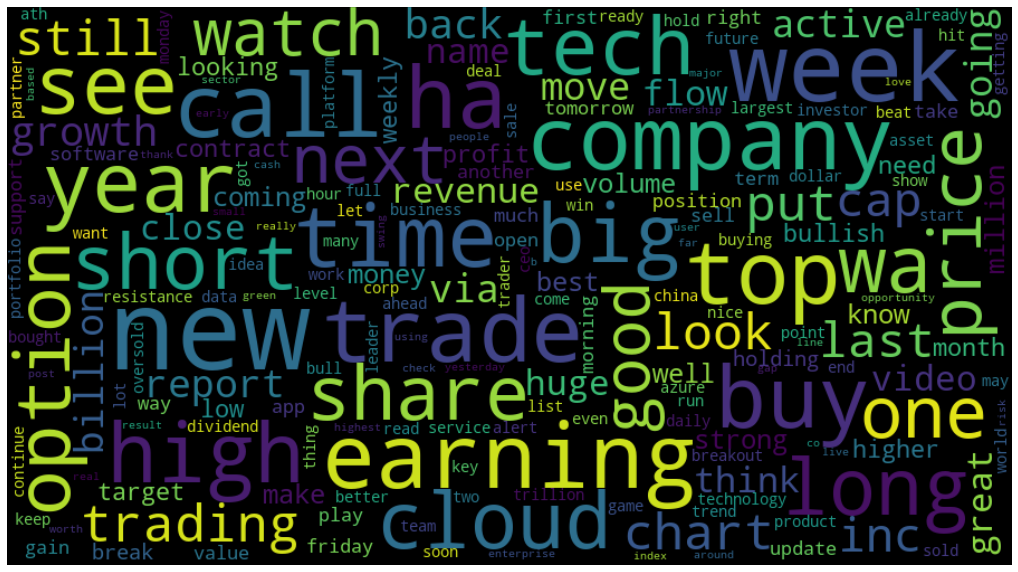

In [119]:
plotWordCloud(merged_df['modify_body'])

In [120]:
# Find frequency of each token in dataframe

freq_unigrams = nltk.FreqDist(" ".join(merged_df['modify_body']).split())
freq_unigrams_df = pd.DataFrame({'Word': list(freq_unigrams.keys()), 'Count': list(freq_unigrams.values())}).sort_values(by=['Count'], ascending=False)

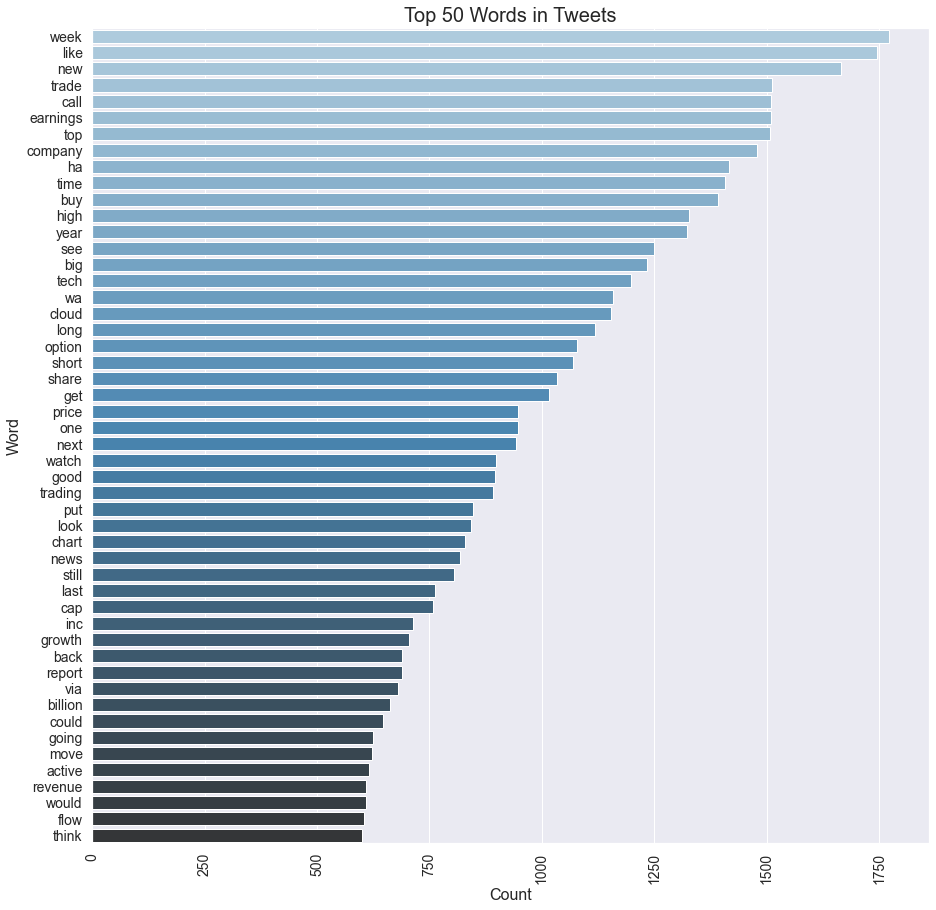

In [121]:
# Plotting most frequent words
plot_freq_unigrams_df = freq_unigrams_df.head(50)

#sns.set(style="darkgrid")
plt.figure(figsize = (15,15))
sns.barplot(x = plot_freq_unigrams_df['Count'], y = plot_freq_unigrams_df['Word'], palette='Blues_d')
plt.title('Top 50 Words in Tweets', fontsize = 20)
plt.xticks(rotation='vertical', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Word', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.show()

In [ ]:
# save as csv file
# freq_unigrams_df.to_csv('Output/freq_unigrams_clean2.csv')

In [122]:
# Check if ticker symbols starting with $ still exist
freq_unigrams_df.loc[freq_unigrams_df['Word'].str.startswith('$', na=False)].sort_values(by=['Count'], ascending=False).head(20)

Empty DataFrame
Columns: [Word, Count]
Index: []

## **Combining Lexicons: VADER, Loughran-McDonald (LMD), General Inquirer (HIV-4) and Custom**
- Modify VADER's default lexicon with LMD's and HIV-4's lists of positive and negative words as well as words from me.
    - LMD and HIV-4 are useful to analyze financials. Some tweets may contain these words.
- Sentiment Analysis is the process of determining whether a tweet is neutral, negative or positive. It provides insights of Twitter users’ attitudes towards the Microsoft stock. The NLTK-VADER library (augmented with LMD, HIV-4 and some words from experience) were applied on each tweet to label its corresponding sentiment as either negative(<-0.6), neutral(=0) or positive(>0.5).
- https://github.com/cjhutto/vaderSentiment

#### **Create positive and negative lists for additional words from LMD and custom**

#### Check existing words

In [123]:
lmd_positive.sample()

word
13  ACHIEVEMENTS

In [124]:
lmd_negative.sample()

word
220  CIRCUMVENT

In [125]:
hiv4_neg_strong.sample()

Entry
21  ASSAULT

In [126]:
hiv4_neg_weak.sample()

Entry
7  ABSENT-MINDED

In [127]:
hiv4_neg_med.sample()

Entry
920  PEST

In [128]:
hiv4_pos_strong.sample()

Entry
39  AMAZEMENT

In [129]:
hiv4_pos_weak.sample()

Entry
8  MODEST

In [130]:
hiv4_pos_med.sample()

Entry
587  IMPORTANT

In [ ]:
# reset lists and dictionaries if applicable
'''
positive_list.clear()
negative_list.clear()
pos_dict.clear()
neg_dict.clear()
merge_lexicon.clear()
'''

#### **Modify to Vader Lexicon - Unigram**

In [131]:
# Convert to list
lmd_pos_list = lmd_positive['word'].str.lower().to_list()
lmd_neg_list = lmd_negative['word'].str.lower().to_list()

hiv4_neg_strong_list = hiv4_neg_strong['Entry'].str.lower().to_list()
hiv4_neg_weak_list = hiv4_neg_weak['Entry'].str.lower().to_list()
hiv4_neg_med_list = hiv4_neg_med['Entry'].str.lower().to_list()
hiv4_pos_strong_list = hiv4_pos_strong['Entry'].str.lower().to_list()
hiv4_pos_weak_list = hiv4_pos_weak['Entry'].str.lower().to_list()
hiv4_pos_med_list = hiv4_pos_med['Entry'].str.lower().to_list()

# Add additional investing words and slangs
# Rating can be assigned anywhere from -4 (extreme neg) to 4 (extreme pos)
add_pos1 = 'buy buying bought bull bullish call calls support underpriced moon skyrocket rocket hold breakout undervalued underpriced oversold pump pumping pumped bounce dividend bottom' \
            'bottomed up established dominant launch launches uptrend adding add added green ath aths pullback loading load loaded reversal pivot rally growth catalyst tendies'

add_pos2 = 'collaboration collaborated dividend scalp surge contract revenue rebound pop growing'

add_neg1 = 'sell selling sold bear bearish bubble overbought overpriced expensive short shorts shorting shorted resistance cover put puts fall falling fell knife tanking fading margin focm correction' \
            'correct corrected correcting corrective miss missed bleeding bled bleed blood bloody autistic bags bag bagged heavy heavyweight stopped stop squeeze squeezed squeezing cover covered covering' \
            ' burn burned burnt manipulation trap sink sunk sinking loss losses lose losing lost dump dumping dumped rig rigged red atl low lowest fomo debt halt halting halted down downward whale wklow' \
            'insider insiders weak buyer rip ripped drop dropped dropping trap trapped ceo cash buyout buyback unprofitable exit exited exiting sue sued lawsuit attorney fail failed failing fails unicorn' \
            'crash crashed crashing wrong hiking hiked hike volatility volatile failure end float stagnate decline declined declining dip dipping dipped cramer dilution diluted misprice mispriced tank tanking' \
            'tanked tanks margin tighten diluting dont'

add_neg2 = 'fomc politician fed feds federal government lawmaker bill powell trump election proxy regulated court case filing cut cutting cuts locked warns warn warned alerts alert alerted alerting' \
            'trouble yikes downtrend wobble paying careful rival rivalry shitiness DumbBears unknown rogue slap stomp stomping stomped discriminate careful unknown carefully slap monster mother' \
            'slide korea korean unusual reassess tax taxes cisco scared disruptive breach week locked killer risk imminent china crack trouble unhealthy blow chna notoriously slowest patience rumor' \
            'thin headache doubt exploit labor nothing former impeachment despicable expiration expired expire expiry morbidly morbid glitching glitch glitched slump smacked dark sadly ' \
            'vulnerability repo antitrust storm pirated unlikely unfair unfairly kicked debt dragging never luster jedi aws fade illegal volatility bankruptcy privacy hacker cyberattack cyberattacks' \
            'mob military securityaffairs ransomeware layoff layoffs stole steal'

add_neg3 = 'block blocked blocking shhh dunno sick steal credit spread culprit whistleblower fake faker faked break risking deflating deflate deflated conviction choppy lower nervous distract' \
            'balloon passive gap severe tough plunge plunged avoid avoided abominable scrutiny escape escaping escaped vague overreact overreacted cost awkward worried bail bailed saturate' \
            'saturating saturated touting tout touted slowdown credit policy offshore slaughter slaughtered exploiting locked wk fight fighting freakin gamble scandal tardes tard tards atls' \
            'leak leaking leaked ridiculously oracle ibm'

add_pos_dict1 = {p:4.0 for p in add_pos1.split(' ')}  #financially releated lingo
add_pos_dict2 = {p:3.0 for p in add_pos2.split(' ')}  #moderate

add_neg_dict1 = {n:-4.0 for n in add_neg1.split(' ')}  #financially releated lingo
add_neg_dict2 = {n:-4.0 for n in add_neg2.split(' ')}  #lingo very adverse impact to financials
add_neg_dict3 = {n:-3.0 for n in add_neg2.split(' ')}  #moderate

# Rating can be assigned anywhere from -4 (extreme neg) to 4 (extreme pos)
# Because these are financially defined words, they both will get the extreme ends

# Add scores to LMD words
lmd_pos_dict = { pos: 4.0 for pos in lmd_pos_list }
lmd_neg_dict = { neg: -4.0 for neg in lmd_neg_list }

# Add scores to HIV-4 words
hiv4_neg_dict1 = { neg: -4.0 for neg in hiv4_neg_strong_list }
hiv4_neg_dict2 = { neg: -2.0 for neg in hiv4_neg_weak_list }
hiv4_neg_dict3 = { neg: -3.0 for neg in hiv4_neg_med_list }
hiv4_pos_dict1 = { pos: 4.0 for pos in hiv4_pos_strong_list }
hiv4_pos_dict2 = { pos: 2.0 for pos in hiv4_pos_weak_list }
hiv4_pos_dict3 = { pos: 3.0 for pos in hiv4_pos_med_list }

# Merge with vader lexicon
merge_lexicon = {**lmd_pos_dict, **lmd_neg_dict, 
                 **hiv4_neg_dict1, **hiv4_neg_dict2, **hiv4_neg_dict3, **hiv4_pos_dict1, **hiv4_pos_dict2, **hiv4_pos_dict3} 
                 #**add_pos_dict1, **add_pos_dict2,**add_neg_dict1, **add_neg_dict2, **add_neg_dict3}
analyzer.lexicon.update(merge_lexicon)

##### Check

In [132]:
#check if merged properly
np.random.seed(1)
random.sample(merge_lexicon.items(), 3)

C:\Users\Home\AppData\Local\Temp/ipykernel_18160/2830248245.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(merge_lexicon.items(), 3)


[('smash', -4.0), ('disgracefully', -4.0), ('smart', 4.0)]

In [133]:
testtest

'jump hug volume look dip enter one'

In [134]:
sentimentScore(testtest)

{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.6124}

#### Apply Sentiment

In [135]:
# Apply the sentimentScore() function
merged_df['sentiment'] = merged_df['modify_body'].apply(analyzer.polarity_scores)

In [136]:
# assign attributes to values
merged_df['comp_clean'] = [c['compound'] for c in merged_df['sentiment']]
merged_df['pos_clean'] = [c['pos'] for c in merged_df['sentiment']]
merged_df['neg_clean'] = [c['neg'] for c in merged_df['sentiment']]
merged_df['neu_clean'] = [c['neu'] for c in merged_df['sentiment']]

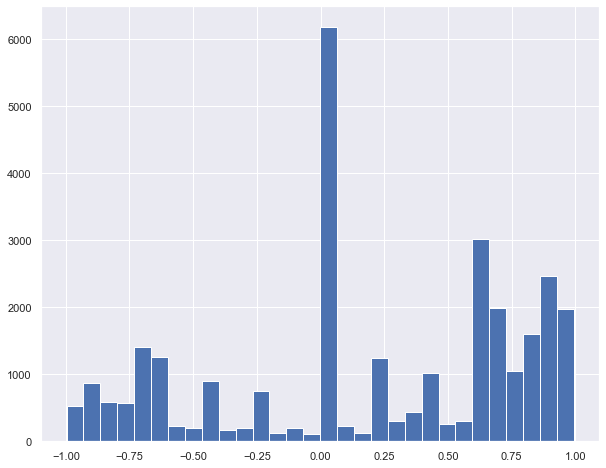

In [137]:
# Frequency for Compound Score
plt.figure(figsize=(10,8)) 
hist_comp = plt.hist(merged_df['comp_clean'],bins=30)

# We can see a significant decrease of tweets with around 0 compound score

In [138]:
# Define tresholds for sentimental classes
sent_values = [1, -1]  # 1 = pos , 0 = neutral, -1 = neg

sent_cond = [merged_df['comp_clean'] >0.45, merged_df['comp_clean']<-0.45]
merged_df['sent_class_clean'] = np.select(sent_cond, sent_values)


# Sample output
np.random.seed(1)
merged_df.sample(2)

post_date                                               body  \
14518 2019-07-09  Monday’s 1: $AMZN $AMD $FB $AAPL $GOOGL $MSFT ...   
11243 2019-06-04  #backtest the #fangstocks for #bearish trade i...   

       engagement  len_body  close_value    volume  open_value  high_value  \
14518          18       146       136.46  19953100      136.00      136.97   
11243           1       143       123.16  29382640      121.28      123.28   

       low_value  prev_close  ...  neg_raw  neu_raw  sent_class_raw  \
14518   135.8000      136.96  ...      0.0      1.0               0   
11243   120.6522      119.84  ...      0.0      1.0               0   

           modify_body  len_modify_body  comp_clean  pos_clean  neg_clean  \
14518           monday                6         0.0        0.0        0.0   
11243  trade idea find               15         0.0        0.0        0.0   

       neu_clean sent_class_clean  
14518        1.0                0  
11243        1.0                0  

[2 rows x 26 columns]

In [139]:
merged_df.groupby('sent_class_clean')['comp_clean'].describe().unstack(1)

       sent_class_clean
count  -1                   6403.000000
        0                  10805.000000
        1                  13090.000000
mean   -1                     -0.713424
        0                      0.038706
        1                      0.764560
std    -1                      0.151042
        0                      0.180593
        1                      0.141610
min    -1                     -0.997100
        0                     -0.445800
        1                      0.452200
25%    -1                     -0.840200
        0                      0.000000
        1                      0.612400
50%    -1                     -0.718400
        0                      0.000000
        1                      0.771700
75%    -1                     -0.612400
        0                      0.153100
        1                      0.891000
max    -1                     -0.451200
        0                      0.447200
        1                      0.994700
dtype: float64

(array([], dtype=float64), [])

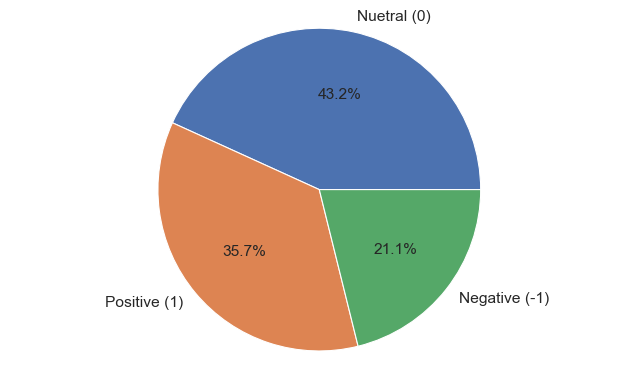

In [140]:
# Plot pie chart of the ratios

fig1, ax1 = plt.subplots(figsize=(10,6), dpi= 80)
ax1.pie(merged_df['sent_class_clean'].value_counts().values, labels=['Nuetral (0)','Positive (1)','Negative (-1)'], autopct='%1.1f%%', textprops={'fontsize': 14})
# ax1.title.set_text("% Distribution of Stock Price Movement for Microsoft")
ax1.axis('equal')
plt.xticks(rotation='horizontal')

Cleaning the tweets result in a reduction in nuetral class distrubtion and improved the distributions of positive and negative classes. <br>
Nuetral from 74.1% to 43.2% <br>
Positive from 21.7% to 35.7% <br>
Negative from 4.1% to 21.1% <br>

### Class Imbalance Measure

In [141]:
# set variables for calculation
sentclean_neu = merged_df[merged_df['sent_class_clean'] == 0].shape[0]
sentclean_pos = merged_df[merged_df['sent_class_clean'] == 1].shape[0]
sentclean_neg = merged_df[merged_df['sent_class_clean'] == -1].shape[0]
sentclean_sum = merged_df['sent_class_clean'].count()
C = 3

print('Count for neutral sentiment class:', sentclean_neu)
print('Count for positive sentiment class:', sentclean_pos)
print('Count for negative sentiment class:',  sentclean_neg)
print('Total instances:', sentclean_sum)
print('Number of classes:', C)

Count for neutral sentiment class: 10805
Count for positive sentiment class: 13090
Count for negative sentiment class: 6403
Total instances: 30298
Number of classes: 3


In [142]:
sentclean_class_measure = abs(1/C - sentclean_neu/sentclean_sum) + abs(1/C - sentclean_pos/sentclean_sum) + abs(1/C - sentclean_neg/sentclean_sum)
print('{0:.3f}'.format(sentclean_class_measure))

0.244


The class distribution post cleaning is much better, reducing the imbalance measure from 0.816 to 0.244.

#### What if neutral is dropped?

In [143]:
new_sum2 = sentclean_pos + sentclean_neg
pclass_measure2 = + abs(1/2 - sentclean_pos/new_sum2) + abs(1/2 - sentclean_neg/new_sum2)
print('{0:.3f}'.format(pclass_measure2))

0.343


If neutral sentiment label was dropped to create a 2 class label, the imbalance measure is 0.343. This is higher than the imbalance measure of 0.244 for the 3 level classification. For this reason, we will continue using 3 levels.

### Plotting histograms post cleaning 

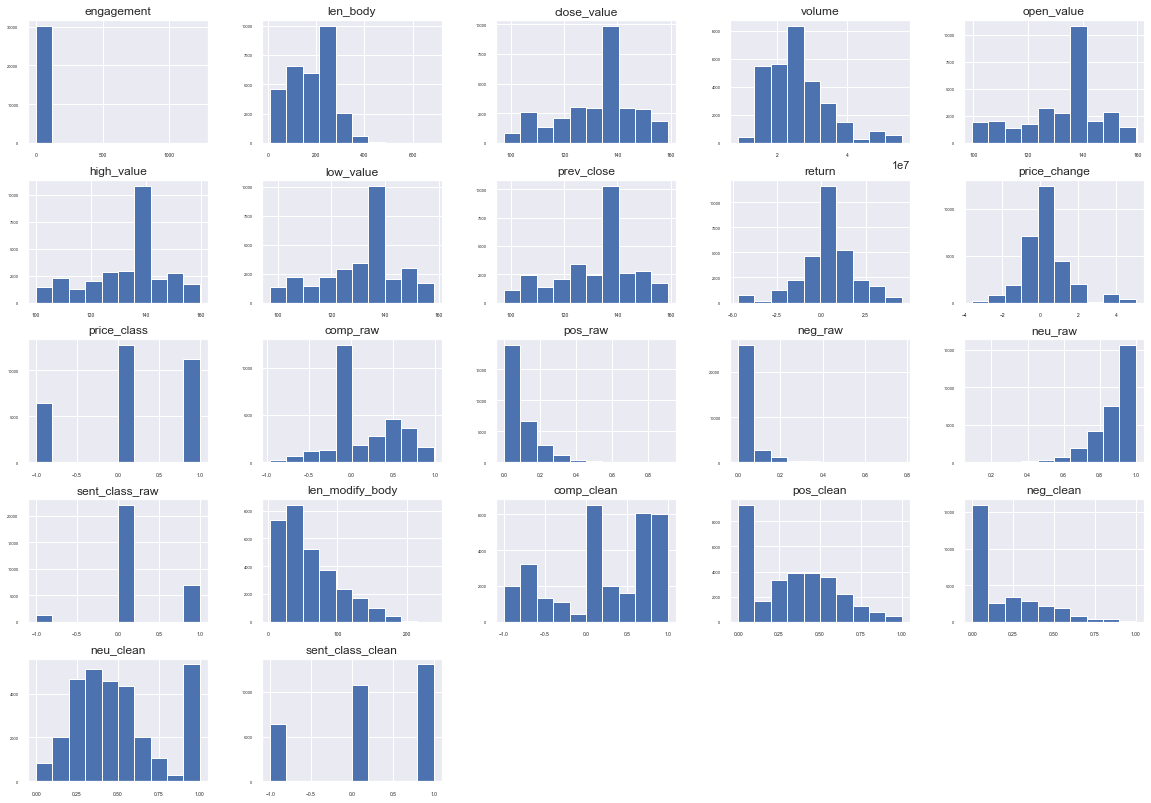

In [144]:
# Check distribution of all post cleaning
sns.set()
merged_df.drop(['post_date'],axis=1).hist(sharex = False, sharey = False, xlabelsize = 5, ylabelsize = 4, figsize=(20, 14))
plt.show()

This set of histograms also include the new attributes related to sentiment where the sentiments of raw tweets vs. clean tweets can be visually compared. <br>
Cleaning data would have only impacted the distribution of len_body vs len_modify_body, comp_raw vs comp_clean, pos_raw vs pos_clean, neg_raw vs neg_clean, neu_raw vs neu_clean and sent_class_raw vs sent_class_clean. Cleaning data has improved the distribution of these attributes. <br>
The distributions of the length of clean tweets, positive sentiment of clean tweets and negative sentiment of clean tweets are right skewed where majority of the distribution is at the left (shorter tweets, lower sentiment scores). <br>
The distribution for neutral sentiment of clean tweets is somewhat normally distributed with the highest frequencies closer to the 1 (higher sentiment score). <br>
The distribution for compound score of clean tweets is also somewhat normally distributed with the highest frequencies closer to 0 (no sentiment). This makes sense as the distribution for neutral sentiment of tweets was closer to 1.

### Frequent Words by Sentiment
- This analysis will provide insight the frequent words that have been labelled via VADER sentiment analysis tool as negative, neutral and positive.
- It provides insight what words are typically considered negative, neutral and positive. This is important to get an idea whether or not the sentiment analysis tool classified the labels correctly. Although, we cannot just look at one word as tweets typically contain more than one word. Due to time constraints, this will not be assessed in this project.

In [145]:
# Find frequency of each token with negative sentiment
neg_df = merged_df[(merged_df['sent_class_clean']==-1)] 

freq_neg = nltk.FreqDist(" ".join(neg_df['modify_body']).split())
freq_neg_df = pd.DataFrame({'Word': list(freq_neg.keys()), 'Count': list(freq_neg.values())}).sort_values(by=['Count'], ascending=False)

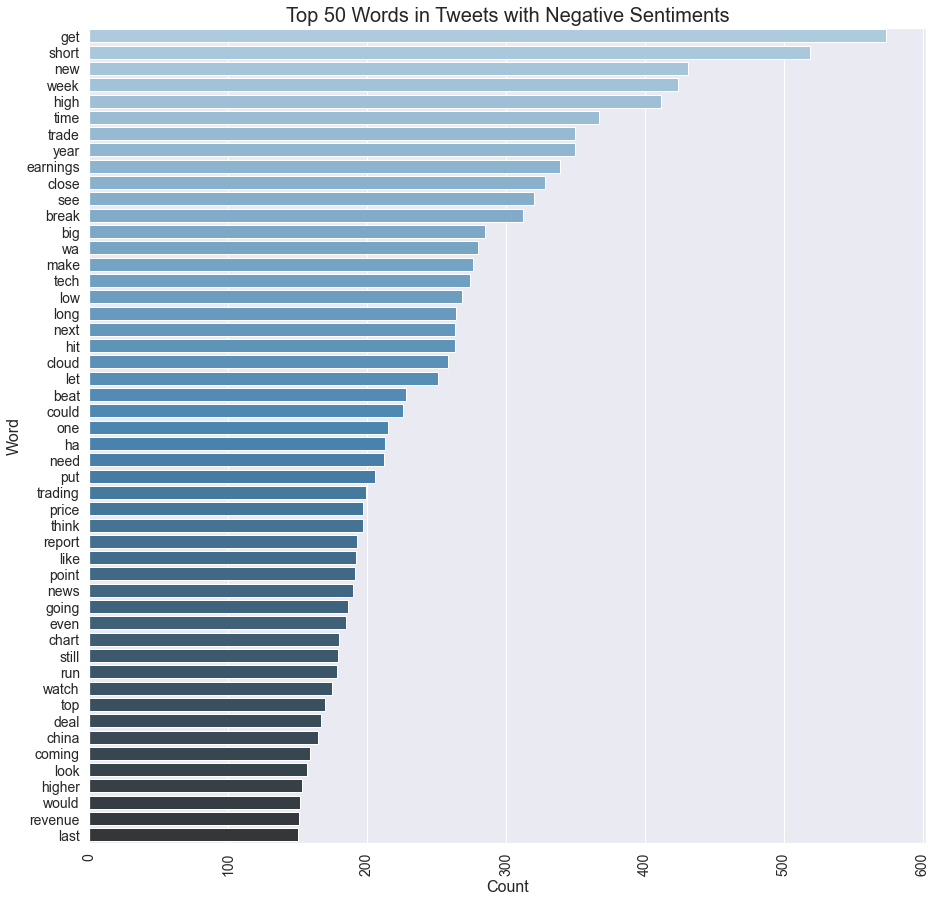

In [146]:
# Plotting most frequent words
plot_freq_neg_df = freq_neg_df.head(50)

sns.set(style="darkgrid")

plt.figure(figsize = (15,15))
sns.barplot(x = plot_freq_neg_df['Count'], y = plot_freq_neg_df['Word'], palette='Blues_d')
plt.title('Top 50 Words in Tweets with Negative Sentiments', fontsize = 20)
plt.xticks(rotation='vertical', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Word', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.show()

In [147]:
# Find frequency of each token with positive sentiment
pos_df = merged_df[(merged_df['sent_class_clean']==1)] 

freq_pos = nltk.FreqDist(" ".join(pos_df['modify_body']).split())
freq_pos_df = pd.DataFrame({'Word': list(freq_pos.keys()), 'Count': list(freq_pos.values())}).sort_values(by=['Count'], ascending=False)

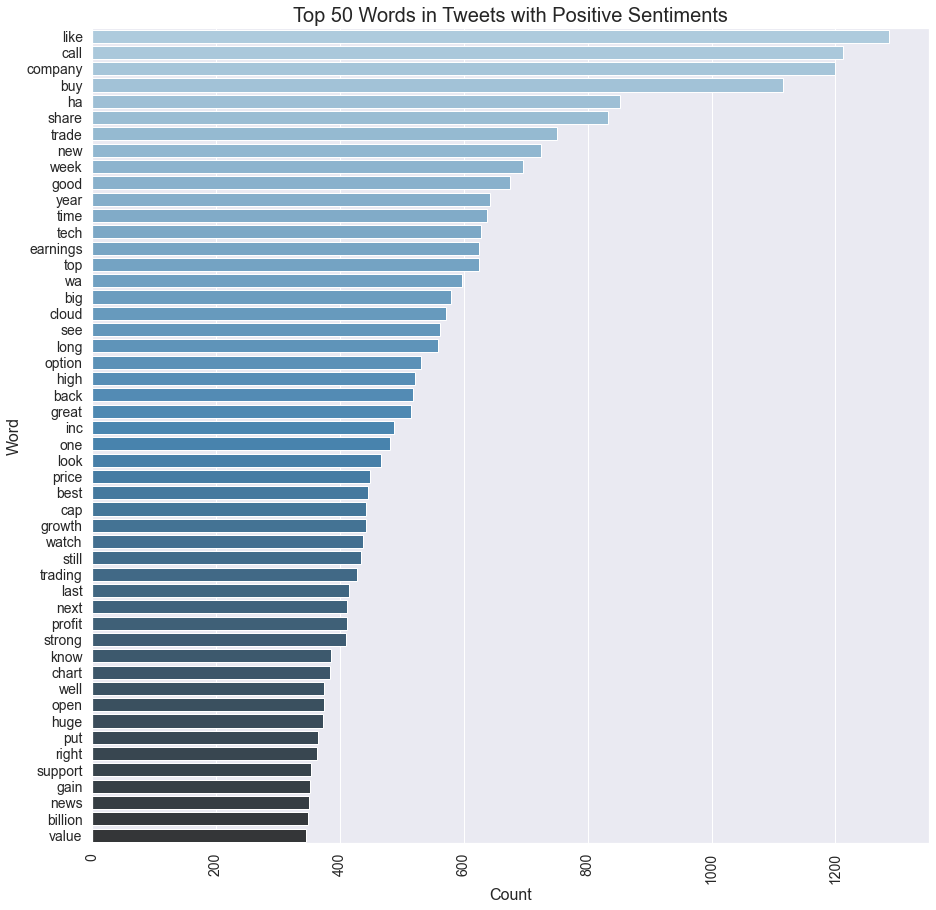

In [148]:
plot_freq_pos_df = freq_pos_df.head(50)

sns.set(style="darkgrid")

plt.figure(figsize = (15,15))
sns.barplot(x = plot_freq_pos_df['Count'], y = plot_freq_pos_df['Word'], palette='Blues_d')
plt.title('Top 50 Words in Tweets with Positive Sentiments', fontsize = 20)
plt.xticks(rotation='vertical', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Word', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.show()

In [149]:
# Find frequency of each token with nuetral sentiment
neu_df = merged_df[(merged_df['sent_class_clean']==0)] 

freq_neu = nltk.FreqDist(" ".join(neu_df['modify_body']).split())
freq_neu_df = pd.DataFrame({'Word': list(freq_neu.keys()), 'Count': list(freq_neu.values())}).sort_values(by=['Count'], ascending=False)

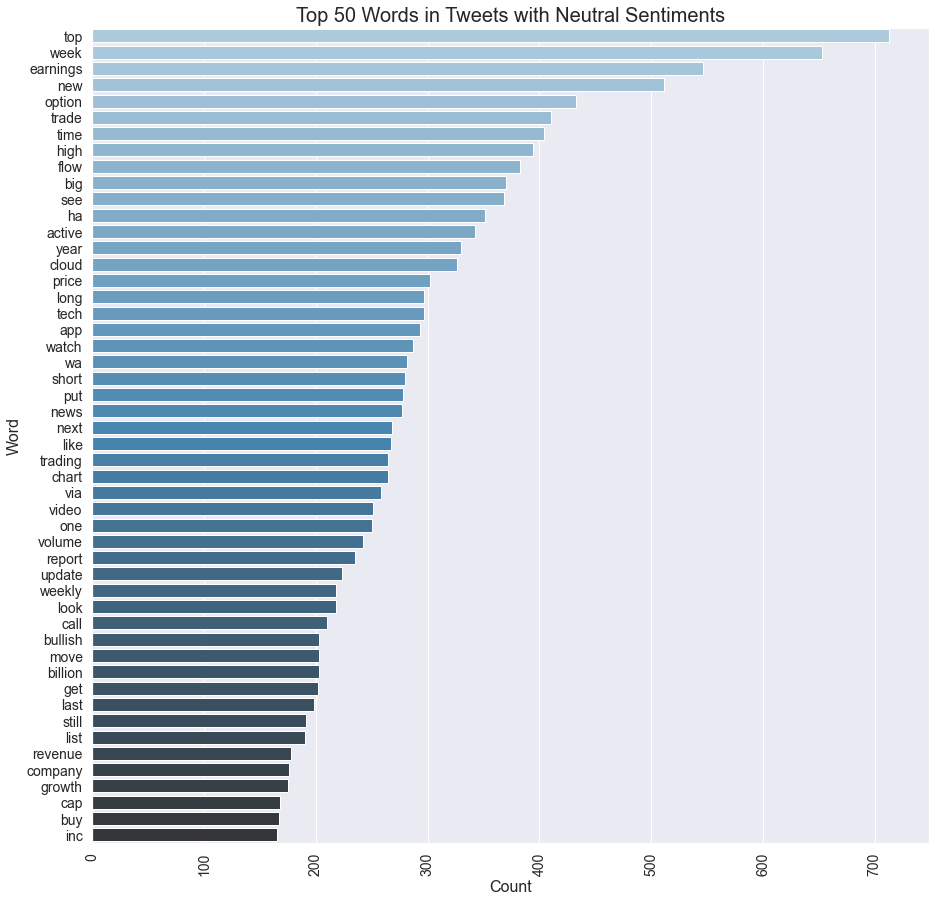

In [150]:
plot_freq_neu_df = freq_neu_df.head(50)

sns.set(style="darkgrid")

plt.figure(figsize = (15,15))
sns.barplot(x = plot_freq_neu_df['Count'], y = plot_freq_neu_df['Word'], palette='Blues_d')
plt.title('Top 50 Words in Tweets with Neutral Sentiments', fontsize = 20)
plt.xticks(rotation='vertical', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Word', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.show()

From the graphs above, we can see that there are some words that appear in all sentiment classes such as top, week and new.

# Correlation
- All features have been calculated and determined. We can now see the correlation map holistically as well as the pair plots. 

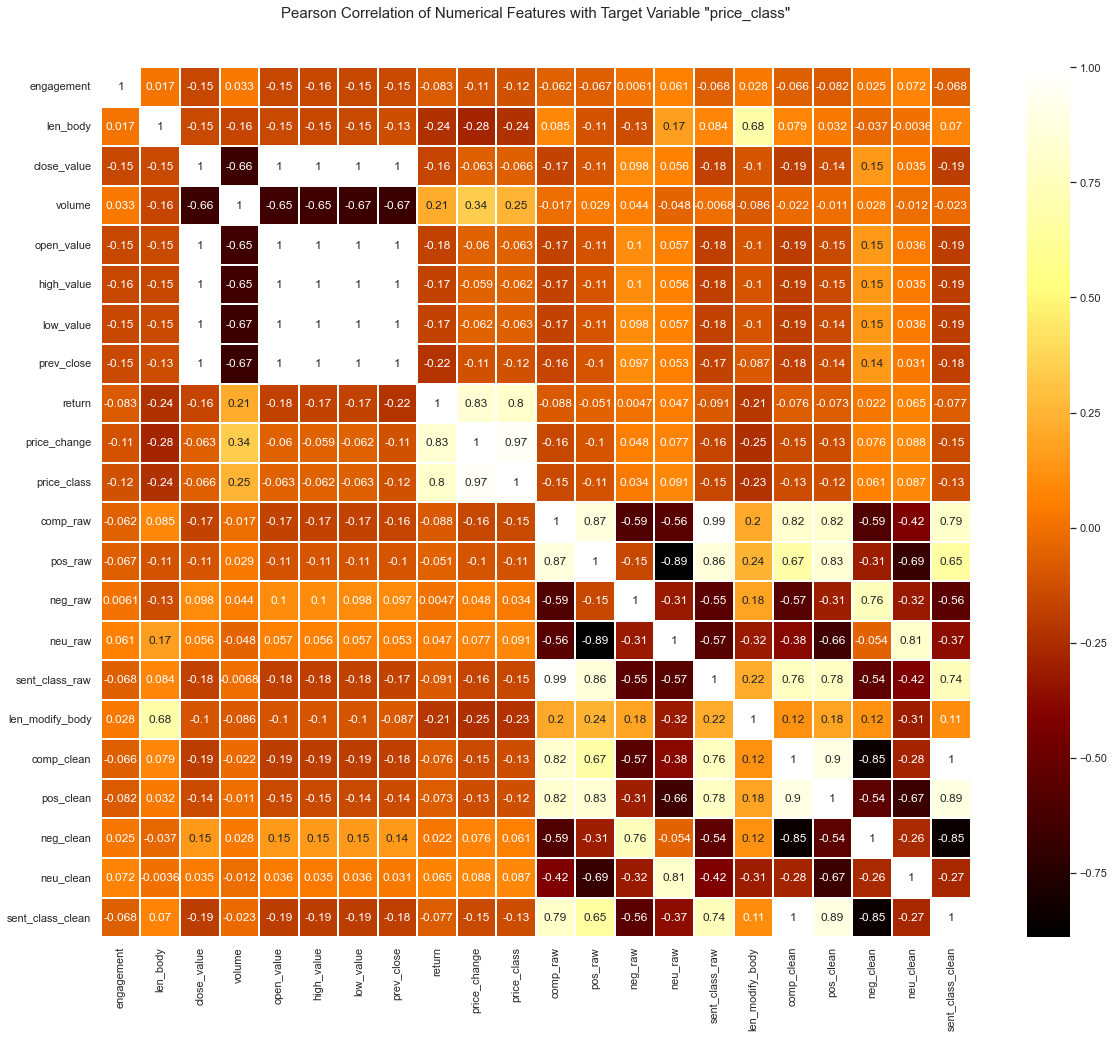

In [151]:
# Correlation between numerical categories
#heatmap_cleandf = merged_df[['engagement','len_body','close_value', 'open_value', 'low_value', 'high_value', 'price_change', 'volume', 'comp_raw','pos_raw','neg_raw','neu_raw', 'comp_clean', 'pos_clean',
#                       'neg_clean', 'neu_clean']].corr()
heatmap_cleandf = merged_df.corr()

colormap = plt.cm.afmhot
plt.figure(figsize=(20,16))
plt.title('Pearson Correlation of Numerical Features with Target Variable "price_class"', y=1.05, size=15)
sns.heatmap(heatmap_cleandf.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

Above correlation matrix now includes features with post data cleaning and filtering. The correlation between the target variable, 'price_class' and sentiment related features are weak. However, the correlations are slightly higher when comparing the target feature with sentiments based on raw tweets vs clean tweets (e.g. neg_raw is 0.034 vs neg_clean is 0.061). 'comp_clean' and 'neg_clean' has higher correlation at -0.85 than 'comp_raw' and 'neg_raw' at -0.59. <br>

### Pairplots - Visualize Correlation
- Diagonal represents the distribution of the 3 levels of price class is shown below
- Non-diagonal represents the relationship between 2 attributes

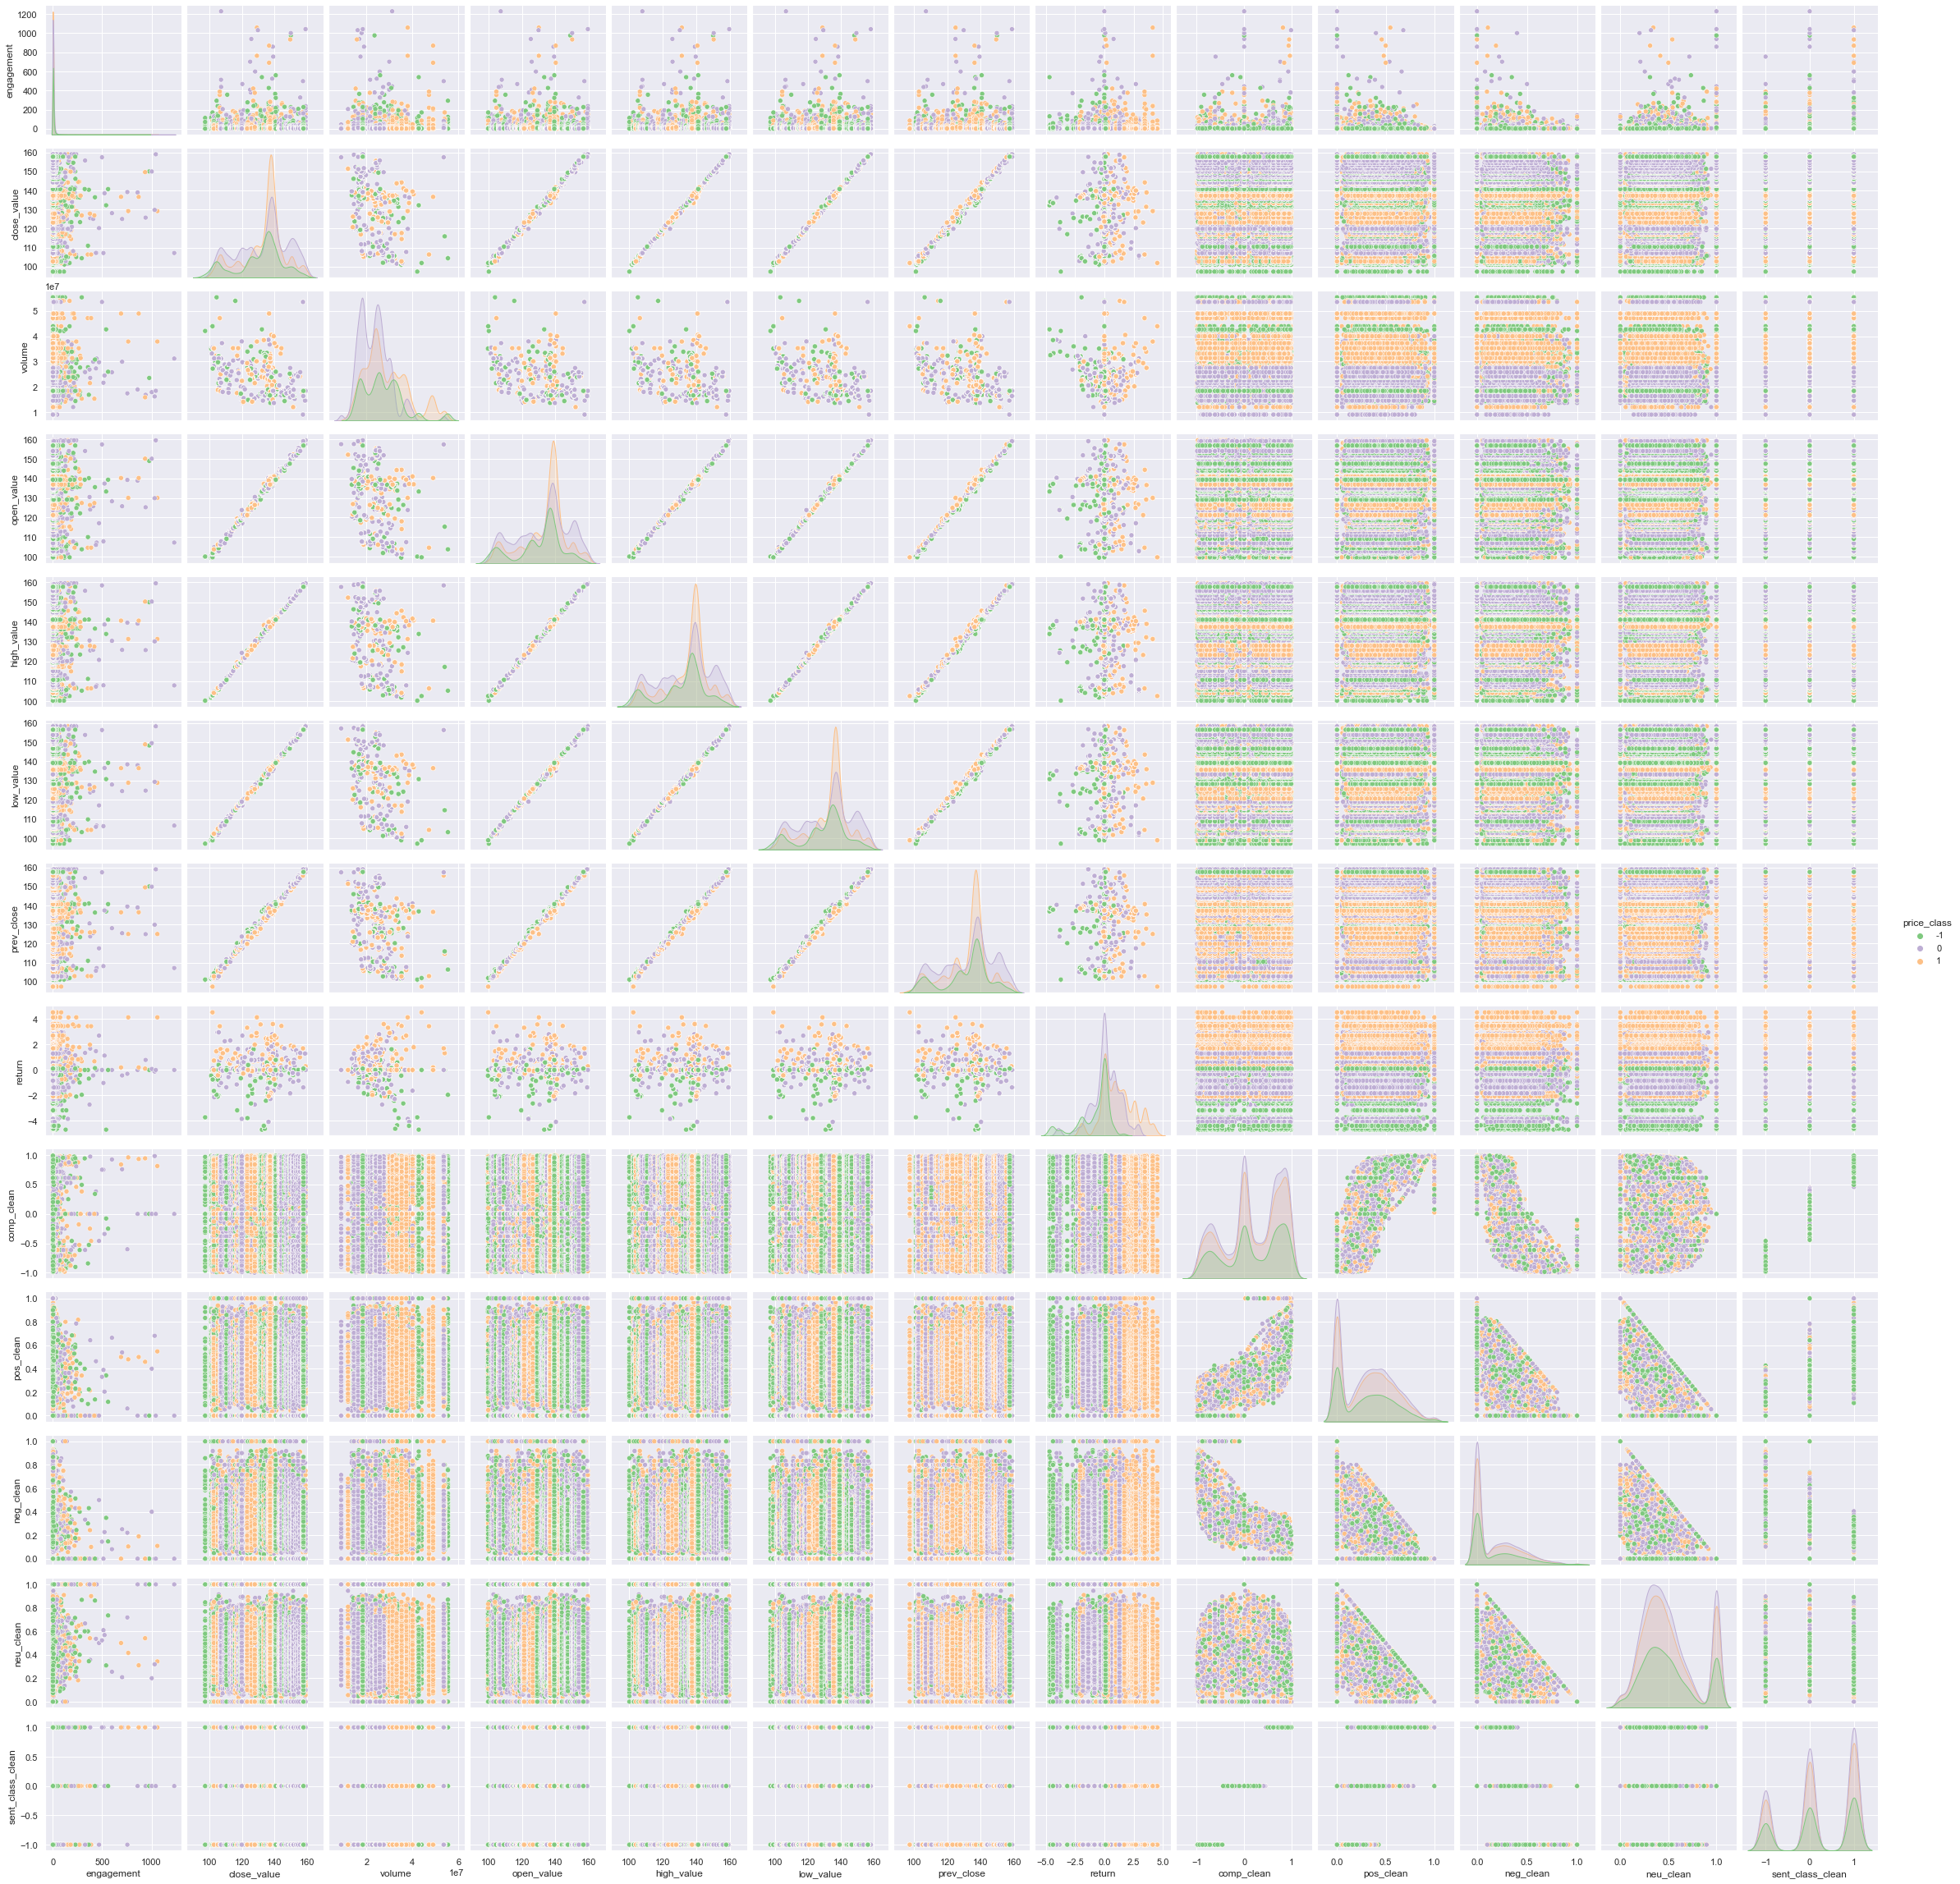

In [152]:
# Pairplots of Numerical Variables by Sentiment CLasses of Clean Tweets

sns.pairplot(merged_df, hue='price_class', vars=['engagement', 'close_value', 'volume', 'open_value', 'high_value', 'low_value', 'prev_close', 'return',
                                                'comp_clean', 'pos_clean', 'neg_clean', 'neu_clean', 'sent_class_clean'],
            palette='Accent')

This pairplot visualizes the variables with close to zero correlation where the y-values are randomly scatted on the grids.

# **Aggregate Columns for Plotting**
- Before conducting feature selection using ANOVA and Random Forest algorithm, let's aggregate to visualize the data (continuous).

In [153]:
time_index_merged_df = merged_df.copy()
# time_index_merged_df['post_date'] = merged_df['post_date']
time_index_merged_df.set_index('post_date',inplace=True)

In [154]:
time_index_merged_df.head(2)

body  engagement  \
post_date                                                                   
2019-01-01  My Top Ten #AR #VR Predictions for 2019:http:/...           3   
2019-01-01  December PerformersCrypto:$BTC -0.3%$ETH +20.2...         153   

            len_body  close_value    volume  open_value  high_value  \
post_date                                                             
2019-01-01       268       101.57  33161320      101.29       102.4   
2019-01-01       253       101.57  33161320      101.29       102.4   

            low_value  prev_close  return  ...  neg_raw  neu_raw  \
post_date                                  ...                     
2019-01-01     100.44      101.57     0.0  ...      0.0    0.937   
2019-01-01     100.44      101.57     0.0  ...      0.0    1.000   

           sent_class_raw                                        modify_body  \
post_date                                                                      
2019-01-01              0                       top ten prediction year bold   
2019-01-01              0  december performerscrypto index major others c...   

            len_modify_body  comp_clean  pos_clean  neg_clean neu_clean  \
post_date                                                                 
2019-01-01               28      0.5267      0.595        0.0     0.405   
2019-01-01               75      0.9001      0.588        0.0     0.412   

            sent_class_clean  
post_date                     
2019-01-01                 1  
2019-01-01                 1  

[2 rows x 25 columns]

In [155]:
# Note: One day has 60*24 = 1440 min
# Take the average scores

aggregate_merged_df = pd.DataFrame()
aggregate_merged_df['close_value'] = time_index_merged_df['close_value'].resample('1440T').mean()
aggregate_merged_df['return'] = time_index_merged_df['return'].resample('1440T').mean()
aggregate_merged_df['price_change'] = time_index_merged_df['price_change'].resample('1440T').mean()
aggregate_merged_df['engagement'] = time_index_merged_df['engagement'].resample('1440T').count()
aggregate_merged_df['comp_raw'] = time_index_merged_df['comp_raw'].resample('1440T').mean()
aggregate_merged_df['comp_clean'] = time_index_merged_df['comp_clean'].resample('1440T').mean()
aggregate_merged_df['price_class'] = time_index_merged_df['price_class'].resample('1440T').mean()
aggregate_merged_df['sent_class_clean'] = time_index_merged_df['sent_class_clean'].resample('1440T').mean()
aggregate_merged_df['pos_clean'] = time_index_merged_df['pos_clean'].resample('1440T').mean()
aggregate_merged_df['neg_clean'] = time_index_merged_df['neg_clean'].resample('1440T').mean()
aggregate_merged_df['neu_clean'] = time_index_merged_df['neu_clean'].resample('1440T').mean()


aggregate_merged_df = aggregate_merged_df.reset_index()

In [156]:
aggregate_merged_df.head(5)

post_date  close_value  return  price_change  engagement  comp_raw  \
0 2019-01-01       101.57    0.00         -0.28          31  0.264235   
1 2019-01-02       101.12   -0.45         -2.02          90  0.157211   
2 2019-01-03        97.40   -3.72         -1.02          97  0.077981   
3 2019-01-04       101.93    4.53          2.32          67  0.104015   
4 2019-01-05       101.93    0.00         -2.21          18  0.154228   

   comp_clean  price_class  sent_class_clean  pos_clean  neg_clean  neu_clean  
0    0.430394          0.0          0.516129   0.459548   0.137032   0.403484  
1    0.164584         -1.0          0.177778   0.322422   0.200589   0.476989  
2    0.074868         -1.0          0.082474   0.264598   0.235990   0.499412  
3    0.192540          1.0          0.208955   0.297731   0.188119   0.514179  
4   -0.013350         -1.0         -0.055556   0.286833   0.223722   0.489278

In [157]:
aggregate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   post_date         365 non-null    datetime64[ns]
 1   close_value       365 non-null    float64       
 2   return            365 non-null    float64       
 3   price_change      365 non-null    float64       
 4   engagement        365 non-null    int64         
 5   comp_raw          365 non-null    float64       
 6   comp_clean        365 non-null    float64       
 7   price_class       365 non-null    float64       
 8   sent_class_clean  365 non-null    float64       
 9   pos_clean         365 non-null    float64       
 10  neg_clean         365 non-null    float64       
 11  neu_clean         365 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 34.3 KB


In [ ]:
# save as csv file
# freq_unigrams_df.to_csv('Output/aggregate_2019.csv')

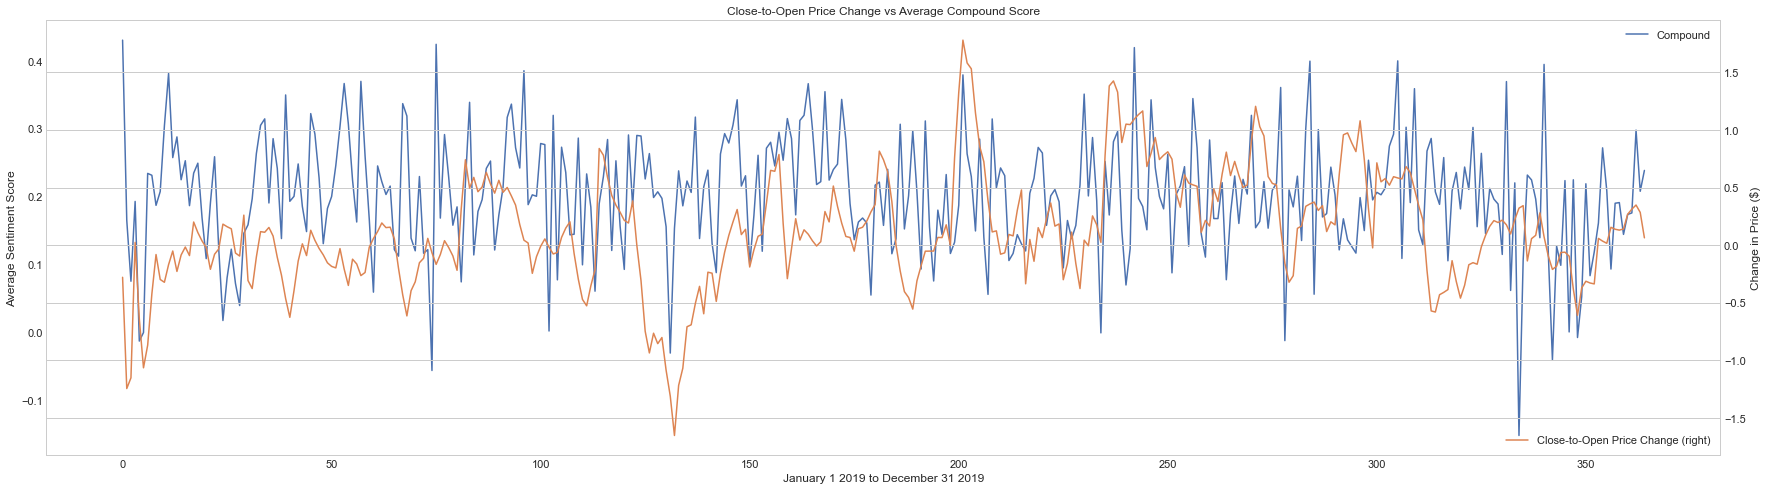

In [159]:
plt.figure(figsize = (30, 8))
plt.style.use('seaborn-whitegrid')
# plt.plot(aggregate_merged_df['close_value'], label = 'Closing Price')
# plt.plot(aggregate_merged_df['price_change'], label = 'Price Change')
# plt.plot(aggregate_merged_df['engagement'], label = 'Engagement')
plt.xlabel('January 1 2019 to December 31 2019')

# Plotting Average Sentiment
#ax = plt.plot(aggregate_merged_df['pos_clean'], label = 'Positive Sentiment')
#ax = plt.plot(aggregate_merged_df['neg_clean'], label = 'Negative Sentiment')
#ax = plt.plot(aggregate_merged_df['neu_clean'], label = 'Neutral Sentiment')
ax = plt.plot(aggregate_merged_df['comp_clean'], label = 'Compound')
plt.legend(loc = 'upper left')
plt.ylabel('Average Sentiment Score',fontsize=12)

# Secondary Axis
# bx = aggregate_merged_df['close_value'].ewm(com=4).mean().plot(secondary_y=True,color='blue', label = 'Closing Price')
bx = aggregate_merged_df['price_change'].ewm(com=4).mean().plot(secondary_y=True, label = 'Close-to-Open Price Change')
plt.ylabel('Change in Price ($)')

plt.title('Close-to-Open Price Change vs Average Compound Score')
plt.legend(loc = 'lower right')

plt.show()

The highest positive peak for price change has compound score peaked as well. 
The lowest negative peak for price change also corresponds with a negative peak in compound score. 
The highest negative peak for compound score high positive price change. 

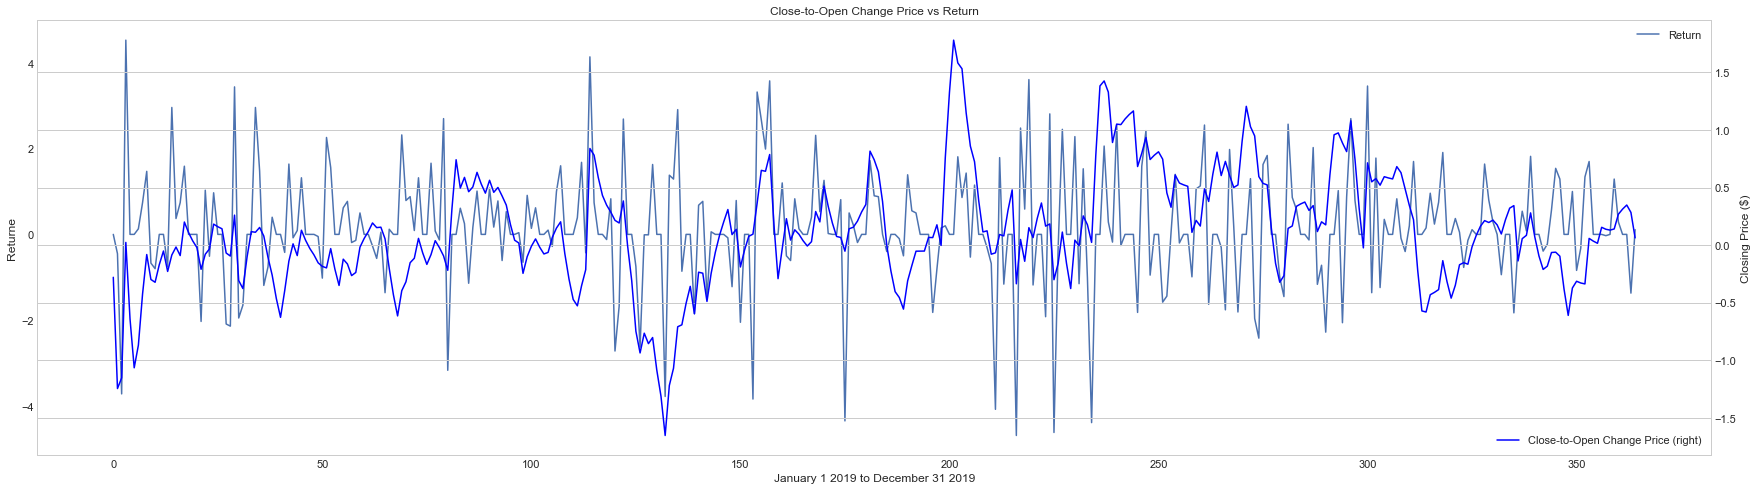

In [160]:
plt.figure(figsize = (30, 8))
plt.xlabel('January 1 2019 to December 31 2019')

# Plotting Return
ax = plt.plot(aggregate_merged_df['return'], label = 'Return')
plt.legend(loc = 'upper left')
plt.ylabel('Returne',fontsize=12)

# Secondary Axis
bx = aggregate_merged_df['price_change'].ewm(com=4).mean().plot(secondary_y=True,color='blue', label = 'Close-to-Open Change Price')
plt.ylabel('Closing Price ($)')

plt.title('Close-to-Open Change Price vs Return')
plt.legend(loc = 'lower right')

plt.show()

When price change is negative, return typically is negative too.
When price change is positive, return is typically positive too.
There are some instances where the two variables are inversely related.

# **Splitting Target Variable from Independent Variables**
- This is for running feature selection algorithms on training dataset.

In [161]:
# get list of numerical attributes
print(list(merged_df._get_numeric_data().columns))

['engagement', 'len_body', 'close_value', 'volume', 'open_value', 'high_value', 'low_value', 'prev_close', 'return', 'price_change', 'price_class', 'comp_raw', 'pos_raw', 'neg_raw', 'neu_raw', 'sent_class_raw', 'len_modify_body', 'comp_clean', 'pos_clean', 'neg_clean', 'neu_clean', 'sent_class_clean']


In [162]:
# exclude all string/object types
X = merged_df[['engagement', 'len_body', 'close_value', 'volume', 'open_value', 'high_value', 'low_value', 'prev_close', 'return', 'price_change',
              'comp_raw', 'pos_raw', 'neg_raw', 'neu_raw', 'sent_class_raw', 'len_modify_body', 'comp_clean', 'pos_clean', 'neg_clean', 'neu_clean', 'sent_class_clean']]
y = merged_df[['price_class']]

In [163]:
# # of rows, # of columns
X.shape

(30298, 21)

In [164]:
y.shape

(30298, 1)

In [165]:
X.head(1)

engagement  len_body  close_value    volume  open_value  high_value  \
0           3       268       101.57  33161320      101.29       102.4   

   low_value  prev_close  return  price_change  ...  pos_raw  neg_raw  \
0     100.44      101.57     0.0         -0.28  ...    0.063      0.0   

   neu_raw  sent_class_raw  len_modify_body  comp_clean  pos_clean  neg_clean  \
0    0.937               0               28      0.5267      0.595        0.0   

   neu_clean  sent_class_clean  
0      0.405                 1  

[1 rows x 21 columns]

In [166]:
y.head(1)

price_class
0            0

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [168]:
X_train.head(3)

engagement  len_body  close_value    volume  open_value  high_value  \
9559            1       137       123.35  33944920      124.11      125.55   
7247            4       139       123.37  27651970      122.19      123.52   
16102          17       175       136.62  48992360      140.22      140.67   

       low_value  prev_close  return  price_change  ...  pos_raw  neg_raw  \
9559    123.0400      127.13   -3.78         -3.02  ...    0.107      0.0   
7247    121.3018      123.37    0.00         -1.18  ...    0.000      0.0   
16102   136.4500      136.42    0.20          3.80  ...    0.000      0.0   

       neu_raw  sent_class_raw  len_modify_body  comp_clean  pos_clean  \
9559     0.893               0               13      0.4019      0.730   
7247     1.000               0               83      0.8828      0.508   
16102    1.000               0               57     -0.6124      0.000   

       neg_clean  neu_clean  sent_class_clean  
9559       0.000      0.270                 0  
7247       0.000      0.492                 1  
16102      0.444      0.556                -1  

[3 rows x 21 columns]

In [169]:
y_train.head(3)

price_class
9559            -1
7247            -1
16102            1

# **Feature Importance & Selection**
This section will investigate 2 methods of determining feature importance. Since we are trying to predict the stock price movement (categorical) with mainly numerical inputs, we will compare ANOVA F-test and recursive feature elimination with cross validation methods. Feature selection is conducted after splitting dataset into training/testing to avoid train-test leakage. <br>
https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after

## Filter Method: ANOVA f-test (Analysis of Variance)
- ANOVA is used when one variable is categorical (such as target feature) and the other(s) are numerical (input features).
- It calculates the f-values for each variable where the biggest value means most relevant feature.
- It computes the ratio between class variance to within class variance.
<br>
https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

In [170]:
from sklearn.feature_selection import SelectKBest, f_classif

#k is the number of features you want to select - let's select all
anova_fs = SelectKBest(f_classif, k='all')

anova_fs.fit(X_train, y_train.values.ravel())
# anova_select.transform(X).shape

anova_fs_df = pd.DataFrame({'Feature':list(X_train.columns), 'Score':anova_fs.scores_})
anova_fs_df.sort_values(by='Score', ascending=False)

Feature         Score
9       price_change  17798.708869
8             return   3412.512241
3             volume    897.099420
4         open_value     87.980020
6          low_value     80.121016
5         high_value     73.683813
2        close_value     65.278374
1           len_body     21.054429
7         prev_close     18.713974
13           neu_raw      2.033796
12           neg_raw      1.710538
16        comp_clean      1.166268
20  sent_class_clean      1.033085
14    sent_class_raw      0.958529
15   len_modify_body      0.813920
11           pos_raw      0.714983
10          comp_raw      0.658917
0         engagement      0.658066
18         neg_clean      0.542611
17         pos_clean      0.537255
19         neu_clean      0.041800

price_change, return and volume are significantly the top 3 highest scores

## Backward Elimination (Recursive Feature Elimination - RFE): Decision Tree Classifier and Random Forest
RFE starts with all variables included in the model. RFE recursively trains and evaluates the model where it drops the least significant feature step by step (depending on 'step' argument). This repeats until the desired number of features to select is eventually reached. <br>
Without manually selecting 'min_features_to_select' argument, this will be determined computationally. <br>
Based on the imbalance measure, the dataset is not perfectly balanced. For this reason, we will use F1-score. More specifically, macro-averaged accuracy will be used because it weighs each class equally rather than each sample.

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import RFECV # this has cross validation

# start with all the features and remove one feature at each step (step = 1)
# cross validation is between 3-fold and 5-fold

### Decision Tree Classifier
This is the most simple model that requires less computer power.

In [173]:
dtc_fs = RFECV(estimator = DecisionTreeClassifier(), step = 1, cv = 5, scoring = 'f1_macro')
dtc_fs.fit(X_train, y_train.values.ravel())
print('Optimal # of features:', dtc_fs.n_features_)
print('Best features:', X_train.columns[dtc_fs.support_])

Optimal # of features: 1
Best features: Index(['price_change'], dtype='object')


In [174]:
dtc_fs_df = pd.DataFrame({'Feature':list(X_train.columns), 'Support':dtc_fs.support_, 'Ranking':dtc_fs.ranking_})
dtc_fs_df.sort_values(by='Ranking', ascending=True)

Feature  Support  Ranking
9       price_change     True        1
20  sent_class_clean    False        2
19         neu_clean    False        3
18         neg_clean    False        4
17         pos_clean    False        5
16        comp_clean    False        6
15   len_modify_body    False        7
14    sent_class_raw    False        8
13           neu_raw    False        9
12           neg_raw    False       10
11           pos_raw    False       11
10          comp_raw    False       12
8             return    False       13
7         prev_close    False       14
6          low_value    False       15
5         high_value    False       16
4         open_value    False       17
3             volume    False       18
2        close_value    False       19
1           len_body    False       20
0         engagement    False       21

C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


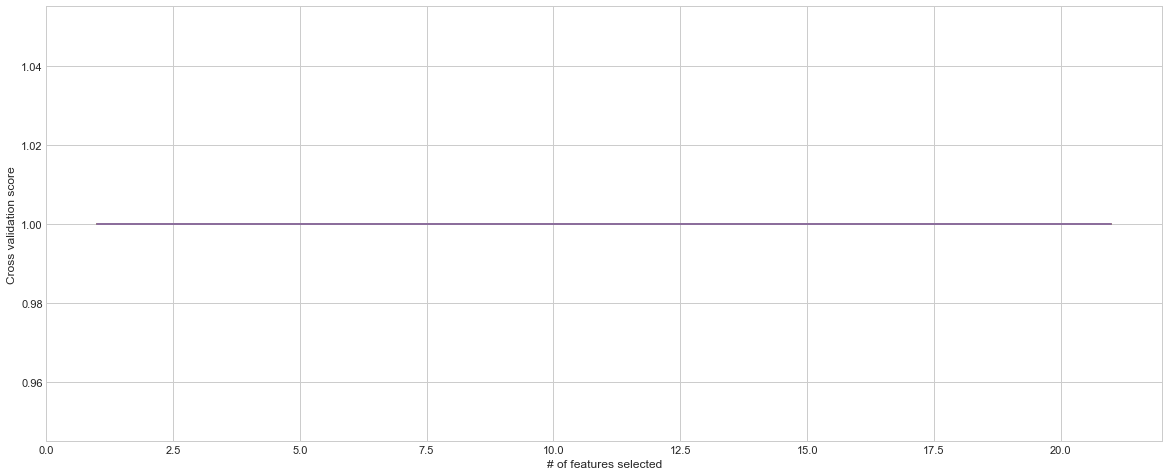

In [175]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel('# of features selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(dtc_fs.grid_scores_) + 1), dtc_fs.grid_scores_)
plt.show()

In [ ]:
 # used because it considers negative and continuous values
lr_fs = RFECV(estimator = LogisticRegression(), step = 1, cv = 5, scoring = 'f1_macro')
lr_fs.fit(X_train, y_train.values.ravel())
print('Optimal # of features :', lr_fs.n_features_)
print('Best features :', X_train.columns[lr_fs.support_])

In [ ]:
lr_fs_df = pd.DataFrame({'Feature':list(X_train.columns), 'Support':lr_fs.support_, 'Ranking':lr_fs.ranking_})
lr_fs_df.sort_values(by='Ranking', ascending=True)

# support returns whether or not the feature is selected as important
# ranking determines the most to least important features

### Random Forest
This model randomly selects all rows/columns to build multiple decision trees where it is more important to be accurate.

In [176]:
rf_fs = RFECV(estimator = RandomForestClassifier(), step = 1, cv = 5, scoring = 'f1_macro')
rf_fs.fit(X_train, y_train.values.ravel())
print('Optimal # of features:', rf_fs.n_features_)
print('Best features:', X_train.columns[rf_fs.support_])

Optimal # of features: 1
Best features: Index(['price_change'], dtype='object')


In [177]:
rf_fs_df = pd.DataFrame({'Feature':list(X_train.columns), 'Support':rf_fs.support_, 'Ranking':rf_fs.ranking_})
rf_fs_df.sort_values(by='Ranking', ascending=True)

Feature  Support  Ranking
9       price_change     True        1
8             return    False        2
3             volume    False        3
6          low_value    False        4
7         prev_close    False        5
4         open_value    False        6
5         high_value    False        7
2        close_value    False        8
1           len_body    False        9
10          comp_raw    False       10
19         neu_clean    False       11
15   len_modify_body    False       12
16        comp_clean    False       13
11           pos_raw    False       14
0         engagement    False       15
13           neu_raw    False       16
17         pos_clean    False       17
18         neg_clean    False       18
12           neg_raw    False       19
20  sent_class_clean    False       20
14    sent_class_raw    False       21

C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


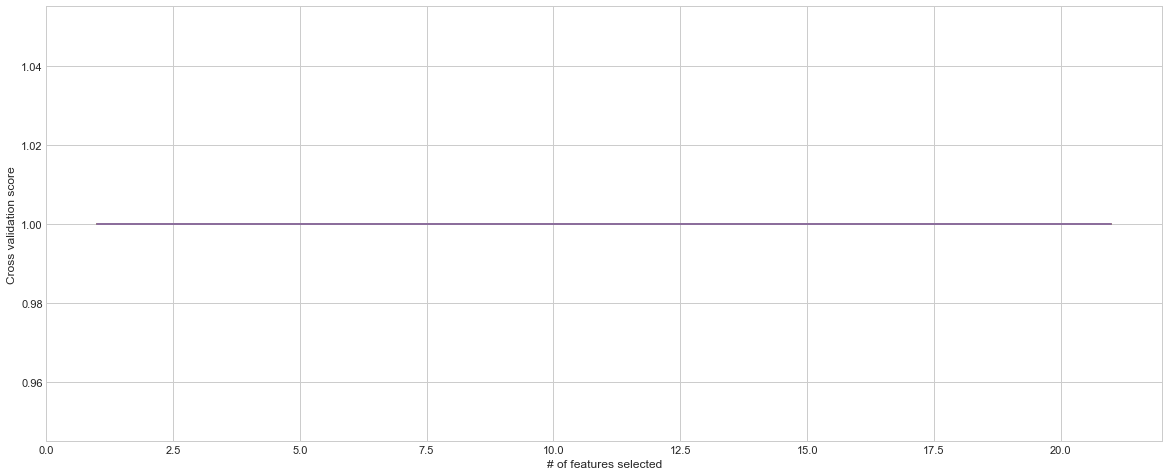

In [178]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel('# of features selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(rf_fs.grid_scores_) + 1), rf_fs.grid_scores_)
plt.show()

In both models, 'price_change' is a clear most important feature. Since 'price_class' is based on this feature, 
we will remove it due to redundancy and determine if the ranking of features will change.

## Running the feature importance models when redundant and unnecessary features are removed

In [179]:
X1 = merged_df[['engagement', 'close_value', 'volume', 'open_value', 'high_value', 'low_value', 'prev_close', 'return',
                'len_modify_body', 'comp_clean', 'pos_clean', 'neg_clean', 'neu_clean', 'sent_class_clean']]
y1 = merged_df[['price_class']]

print(X1.shape, y1.shape)

(30298, 14) (30298, 1)


In [180]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=123)

### ANOVA F-test

In [181]:
anova_fs.fit(X1_train, y1_train.values.ravel())

anova_fs_df = pd.DataFrame({'Feature':list(X1_train.columns), 'Score':anova_fs.scores_})
anova_fs_df.sort_values(by='Score', ascending=False)

Feature        Score
7             return  3412.512241
2             volume   897.099420
3         open_value    87.980020
5          low_value    80.121016
4         high_value    73.683813
1        close_value    65.278374
6         prev_close    18.713974
9         comp_clean     1.166268
13  sent_class_clean     1.033085
8    len_modify_body     0.813920
0         engagement     0.658066
11         neg_clean     0.542611
10         pos_clean     0.537255
12         neu_clean     0.041800

### Backward Elimination (Recursive Feature Elimination - RFE): Decision Tree Classifier and Random Forest

#### Decision Tree Classifier

In [182]:
dtc_fs.fit(X1_train, y1_train.values.ravel())
print('Optimal # of features:', dtc_fs.n_features_)
print('Best features:', X1_train.columns[dtc_fs.support_])
dtc_fs_df = pd.DataFrame({'Feature':list(X1_train.columns), 'Support':dtc_fs.support_, 'Ranking':dtc_fs.ranking_})
dtc_fs_df.sort_values(by='Ranking', ascending=True)

Optimal # of features: 3
Best features: Index(['volume', 'prev_close', 'return'], dtype='object')


Feature  Support  Ranking
2             volume     True        1
6         prev_close     True        1
7             return     True        1
3         open_value    False        2
5          low_value    False        3
4         high_value    False        4
1        close_value    False        5
13  sent_class_clean    False        6
12         neu_clean    False        7
11         neg_clean    False        8
10         pos_clean    False        9
9         comp_clean    False       10
8    len_modify_body    False       11
0         engagement    False       12

#### Random Forest

In [183]:
rf_fs.fit(X1_train, y1_train.values.ravel())
print('Optimal # of features:', rf_fs.n_features_)
print('Best features:', X1_train.columns[rf_fs.support_])
rf_fs_df = pd.DataFrame({'Feature':list(X1_train.columns), 'Support':rf_fs.support_, 'Ranking':rf_fs.ranking_})
rf_fs_df.sort_values(by='Ranking', ascending=True)

Optimal # of features: 2
Best features: Index(['volume', 'return'], dtype='object')


Feature  Support  Ranking
2             volume     True        1
7             return     True        1
3         open_value    False        2
6         prev_close    False        3
5          low_value    False        4
4         high_value    False        5
1        close_value    False        6
9         comp_clean    False        7
8    len_modify_body    False        8
12         neu_clean    False        9
10         pos_clean    False       10
0         engagement    False       11
11         neg_clean    False       12
13  sent_class_clean    False       13

'volume' and 'return are the top features consistent in the three algorithms, so these attributes will be used in predicting stock price trend (prediction without sentiments). <br>
'comp_clean', 'nue_clean', 'pos_clean' 'neg_clean' and 'sent_class_clean' are still ranked near the bottom of feature selection. Since we are comparing prediction with and without sentiments, we will need these attributes related to sentiment.

# CSV file
- for modelling in another Jupyter Notebook

In [194]:
merged_df2 = merged_df.copy()
merged_df2 = merged_df2.drop(['body', 'modify_body', 'len_body', 'sentiment', 'comp_raw', 'pos_raw', 'neg_raw', 'neu_raw', 'sent_class_raw',
               'price_change', 'sent_class_clean'], axis=1, inplace=False)

In [196]:
merged_df2.head(2)

post_date  engagement  close_value    volume  open_value  high_value  \
0 2019-01-01           3       101.57  33161320      101.29       102.4   
1 2019-01-01         153       101.57  33161320      101.29       102.4   

   low_value  prev_close  return  price_class  len_modify_body  comp_clean  \
0     100.44      101.57     0.0            0               28      0.5267   
1     100.44      101.57     0.0            0               75      0.9001   

   pos_clean  neg_clean  neu_clean  
0      0.595        0.0      0.405  
1      0.588        0.0      0.412

In [197]:
merged_df2.to_csv('./Output/working_df.csv', index=False)

In [ ]:
merged_df.describe()

In [ ]:
df.to_csv('./Output/clean_df.csv', index=False)

In [ ]:
clean_df = merged_df.drop(['body', 'modify_body', 'sentiment'], axis=1, inplace=True)

In [ ]:
df = merged_df[['post_date', 'engagement', 'close_value', 'price_change', 'comp_raw', 'comp_clean', 
                'engage_class', 'price_class', 'sent_class_raw', 'sent_class_clean', 'body', 'modify_body', 'pos_clean', 'neg_clean', 'neu_clean']].copy()
#df = merged_df[['post_date', 'engagement', 'close_value', 'price_change', 'comp_raw', 'comp_clean', 'engage_class', 'price_class', 'sent_class_raw', 'sent_class_clean', 'body', 'modify_body']].copy()

df.head(5)

In [ ]:
# export entire merged_df file
merged_df.to_csv('./Output/merged_df.csv', index=False)

In [ ]:
# df = merged_df[['post_date', 'engagement', 'close_value', 'price_change', 'comp_raw', 'comp_clean', 'engage_class', 'price_class', 'sent_class_raw', 'sent_class_clean']].copy()
df_test = merged_df[['body', 'modify_body','sent_class_clean']].copy()
df_test.head(10)